## Random Forest Model

In [1]:
import numpy as np
import pandas as pd

In [2]:
feature_pickle = '/Users/ZhijingYe/Desktop/data/output/modified_features_and_label.pkl'
df = pd.read_pickle(feature_pickle)
df.head()

,uid,song_popular,device,major_song_type,song_popularity_ratio,total_play_time,avg_play_time,least_pop_count,most_popular_count,count_in_recent_1week,count_in_recent_2week,count_in_recent_3week,count_in_recent_4week,count_in_recent_8week,label,avg_complete_ratio,days_since_last_play,active_days,play_time_bins
0,100052111,0.107143,ar,0,0.107143,0.000000,0.000000,0.0,58.0,112,0,0,0,0,1,0.035714,2,1,"[0.0, 100.0)"
1,100107633,0.500000,ar,0,0.500000,3.033333,45.500000,0.0,4.0,0,0,4,0,0,1,0.222754,20,1,"[0.0, 100.0)"
2,100223381,0.000000,ar,0,0.000000,33.333333,125.000000,6.0,0.0,0,1,15,0,0,1,0.603366,12,2,"[0.0, 100.0)"
3,100581940,0.800000,ar,0,0.800000,17.200000,51.600000,1.0,17.0,0,0,0,20,0,1,0.449106,23,1,"[0.0, 100.0)"
4,100733657,0.434783,ar,0,0.434783,374.766667,195.530435,0.0,72.0,0,0,0,0,115,1,0.851314,43,7,"[100.0, 400.0)"


In [3]:
df = df.set_index('uid')
df.shape

(150849, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150849 entries, 100052111 to 99995513 
Data columns (total 18 columns):
song_popular             150849 non-null float64
device                   150849 non-null object
major_song_type          150849 non-null object
song_popularity_ratio    150849 non-null float64
total_play_time          150849 non-null float64
avg_play_time            150798 non-null float64
least_pop_count          150849 non-null float64
most_popular_count       150849 non-null float64
count_in_recent_1week    150849 non-null int64
count_in_recent_2week    150849 non-null int64
count_in_recent_3week    150849 non-null int64
count_in_recent_4week    150849 non-null int64
count_in_recent_8week    150849 non-null int64
label                    150849 non-null int64
avg_complete_ratio       150849 non-null float64
days_since_last_play     150849 non-null int64
active_days              150849 non-null int64
play_time_bins           150849 non-null object
dtypes: float64(7), 

In [5]:
df.isnull().sum(axis = 0)

song_popular              0
device                    0
major_song_type           0
song_popularity_ratio     0
total_play_time           0
avg_play_time            51
least_pop_count           0
most_popular_count        0
count_in_recent_1week     0
count_in_recent_2week     0
count_in_recent_3week     0
count_in_recent_4week     0
count_in_recent_8week     0
label                     0
avg_complete_ratio        0
days_since_last_play      0
active_days               0
play_time_bins            0
dtype: int64

In [6]:
df.loc[df.avg_play_time.isnull() == True]

,song_popular,device,major_song_type,song_popularity_ratio,total_play_time,avg_play_time,least_pop_count,most_popular_count,count_in_recent_1week,count_in_recent_2week,count_in_recent_3week,count_in_recent_4week,count_in_recent_8week,label,avg_complete_ratio,days_since_last_play,active_days,play_time_bins
uid,,,,,,,,,,,,,,,,,,
150730808,0.000,ar,2,0.000,0.0,NaN,0.0,0.0,0,0,0,0,1,1,0.000,51,1,"[0.0, 100.0)"
154414798,0.000,ar,2,0.000,0.0,NaN,0.0,0.0,0,0,0,0,1,1,0.000,51,1,"[0.0, 100.0)"
154418848,0.000,ar,0,0.000,0.0,NaN,2.0,0.0,0,0,0,0,2,1,1.000,51,1,"[0.0, 100.0)"
154424103,0.000,ar,2,0.000,0.0,NaN,0.0,0.0,0,0,0,0,1,1,0.000,51,1,"[0.0, 100.0)"
154429208,0.000,ar,0,0.000,0.0,NaN,0.0,1.0,0,0,0,0,1,1,1.000,51,1,"[0.0, 100.0)"
154437518,0.000,ar,2,0.000,0.0,NaN,0.0,1.0,0,0,0,0,1,1,0.000,51,1,"[0.0, 100.0)"
154440795,1.000,ar,0,1.000,0.0,NaN,0.0,4.0,0,0,0,0,4,1,0.250,51,1,"[0.0, 100.0)"
154457344,0.000,ar,2,0.000,0.0,NaN,0.0,0.0,0,0,0,0,2,1,0.000,51,1,"[0.0, 100.0)"
154499254,0.000,ar,0,0.000,0.0,NaN,0.0,30.0,0,0,0,0,30,1,1.000,51,1,"[0.0, 100.0)"


In [7]:
df.loc[df.avg_play_time.isnull() == True, 'avg_play_time'] = 0

In [8]:
df.isnull().sum(axis = 0)

song_popular             0
device                   0
major_song_type          0
song_popularity_ratio    0
total_play_time          0
avg_play_time            0
least_pop_count          0
most_popular_count       0
count_in_recent_1week    0
count_in_recent_2week    0
count_in_recent_3week    0
count_in_recent_4week    0
count_in_recent_8week    0
label                    0
avg_complete_ratio       0
days_since_last_play     0
active_days              0
play_time_bins           0
dtype: int64

In [9]:
df.describe()

,song_popular,song_popularity_ratio,total_play_time,avg_play_time,least_pop_count,most_popular_count,count_in_recent_1week,count_in_recent_2week,count_in_recent_3week,count_in_recent_4week,count_in_recent_8week,label,avg_complete_ratio,days_since_last_play,active_days
count,150849.000000,150849.000000,1.508490e+05,1.508490e+05,150849.000000,150849.000000,150849.000000,150849.000000,150849.000000,150849.000000,150849.000000,150849.000000,150849.000000,150849.000000,150849.000000
mean,0.420286,0.420286,6.231734e+03,4.229245e+03,1.765633,81.705494,22.603604,24.421766,33.880622,16.644022,19.066974,0.692394,0.611683,20.646985,4.470583
std,0.321195,0.321195,2.399999e+05,1.571550e+05,8.661516,222.998571,92.611360,105.093632,117.383359,45.782119,87.302607,0.461504,0.259956,16.940150,4.720979
min,0.000000,0.000000,0.000000e+00,-3.976806e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.137255,0.137255,1.365000e+01,7.225000e+01,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.421012,5.000000,1.000000
50%,0.387097,0.387097,6.101667e+01,1.322333e+02,0.000000,20.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.634310,20.000000,2.000000
75%,0.666667,0.666667,2.637167e+02,1.937560e+02,1.000000,75.000000,3.000000,7.000000,22.000000,15.000000,0.000000,1.000000,0.827989,23.000000,6.000000
max,1.000000,1.000000,3.579208e+07,2.926000e+07,824.000000,30670.000000,8820.000000,17666.000000,12754.000000,2631.000000,9028.000000,1.000000,1.000000,51.000000,23.000000


In [10]:
df_dummies = pd.get_dummies(df,columns = ['device','major_song_type','play_time_bins'])
df_dummies = df_dummies.drop('label',axis = 1)
df_dummies.head()

,song_popular,song_popularity_ratio,total_play_time,avg_play_time,least_pop_count,most_popular_count,count_in_recent_1week,count_in_recent_2week,count_in_recent_3week,count_in_recent_4week,...,major_song_type_1,major_song_type_2,major_song_type_3,"play_time_bins_[0.0, 100.0)","play_time_bins_[100.0, 400.0)","play_time_bins_[400.0, 700.0)","play_time_bins_[700.0, 1000.0)","play_time_bins_[1000.0, 7000.0)","play_time_bins_[7000.0, 10000.0)","play_time_bins_[10000.0, inf)"
uid,,,,,,,,,,,,,,,,,,,,,
100052111,0.107143,0.107143,0.000000,0.000000,0.0,58.0,112,0,0,0,...,0,0,0,1,0,0,0,0,0,0
100107633,0.500000,0.500000,3.033333,45.500000,0.0,4.0,0,0,4,0,...,0,0,0,1,0,0,0,0,0,0
100223381,0.000000,0.000000,33.333333,125.000000,6.0,0.0,0,1,15,0,...,0,0,0,1,0,0,0,0,0,0
100581940,0.800000,0.800000,17.200000,51.600000,1.0,17.0,0,0,0,20,...,0,0,0,1,0,0,0,0,0,0
100733657,0.434783,0.434783,374.766667,195.530435,0.0,72.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
X = df_dummies.values
y = df.label.values

In [12]:
X.shape, y.shape

((150849, 27), (150849,))

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_test.shape, y_test.shape

((45255, 27), (45255,))

In [14]:
X_train.shape, y_train.shape

((105594, 27), (105594,))

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


In [16]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(max_depth=10, n_estimators=200, min_samples_leaf=20, \
                                   max_features = 'auto', n_jobs = -1, random_state = 42)

model_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [17]:
model_rfc.score(X_train, y_train),model_rfc.score(X_test, y_test)

(0.8854196261151202, 0.8792398629985637)

In [18]:
roc_auc_score(y_test, model_rfc.predict(X_test))

0.8502110798163869

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
scores = cross_val_score(model_rfc, X_train, y_train, cv=5)

In [21]:
scores_rfc = scores
print scores_rfc

[0.88176524 0.87617785 0.87584639 0.87972915 0.88180699]


### This rfc model is very stable and gives relatively high score

### Grid search to find the best parameters:

In [22]:
rfc = RandomForestClassifier(max_features = 'auto', n_jobs = -1, oob_score = True)

In [23]:
# Tune model parameters
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

max_depth = [10, 50, 200]
n_estimators = [50, 200, 500]
min_samples_leaf = [5, 10, 20]

param_grid = {'max_depth': max_depth,
               'n_estimators': n_estimators,
               'min_samples_leaf': min_samples_leaf}

scores = ['accuracy']

for score in scores:
    print ("# Tuning hyper-parameters for %s" % score + "\n\n")
    cv_rfc= GridSearchCV(rfc,
                       param_grid,
                       cv = 3,
                       scoring = score)
    cv_rfc.fit(X_train[:, :], y_train[:])
    print ("Best parameters set found on ")
    print (cv_rfc.best_params_)
    print ("\nGrid scores on development set:")
    means = cv_rfc.cv_results_["mean_test_score"]
    stds = cv_rfc.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, cv_rfc.cv_results_['params']):
        print("%0.3f (+/-%0.3f) for %r"
               % (mean, std*2, params))
    


# Tuning hyper-parameters for accuracy


Best parameters set found on 
{'n_estimators': 500, 'max_depth': 200, 'min_samples_leaf': 20}

Grid scores on development set:
0.879 (+/-0.003) for {'n_estimators': 50, 'max_depth': 10, 'min_samples_leaf': 5}
0.879 (+/-0.003) for {'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 5}
0.880 (+/-0.003) for {'n_estimators': 500, 'max_depth': 10, 'min_samples_leaf': 5}
0.879 (+/-0.003) for {'n_estimators': 50, 'max_depth': 10, 'min_samples_leaf': 10}
0.879 (+/-0.004) for {'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 10}
0.880 (+/-0.003) for {'n_estimators': 500, 'max_depth': 10, 'min_samples_leaf': 10}
0.879 (+/-0.003) for {'n_estimators': 50, 'max_depth': 10, 'min_samples_leaf': 20}
0.879 (+/-0.003) for {'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 20}
0.880 (+/-0.003) for {'n_estimators': 500, 'max_depth': 10, 'min_samples_leaf': 20}
0.879 (+/-0.003) for {'n_estimators': 50, 'max_depth': 50, 'min_samples_leaf': 5}


In [24]:
print ("\nDetailed classificationi report:\n")
print ("The model is strained on the full develpment set.")
print ("The scores are computed on the full evaluation set.")
print ("\n")
y_true, y_pred = y_test, cv_rfc.predict(X_test)
print (classification_report(y_true, y_pred))
print ("\n")



Detailed classificationi report:

The model is strained on the full develpment set.
The scores are computed on the full evaluation set.


             precision    recall  f1-score   support

          0       0.82      0.78      0.80     13937
          1       0.90      0.92      0.91     31318

avg / total       0.88      0.88      0.88     45255





### The best parameters for Random Forest model are found:
{'n_estimators': 50, 'max_depth': 50, 'min_samples_leaf': 10} <br>
Actually, the model preformance does not change much with the parameters.

In [25]:
model_rfc_tuned = RandomForestClassifier(max_depth=50, n_estimators=50, min_samples_leaf=10,\
                                         max_features = 'auto', n_jobs = -1, oob_score = True,\
                                         random_state = 42)

model_rfc_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [26]:
model_rfc_tuned.score(X_train, y_train),model_rfc_tuned.score(X_test, y_test)

(0.9061120897020664, 0.8798806761683792)

In [27]:
roc_auc_score(y_test, model_rfc_tuned.predict(X_test))

0.8522469992288242

In [28]:
importance_coeff = model_rfc_tuned.feature_importances_
importance_coeff

array([1.48820253e-02, 1.36355660e-02, 3.78403433e-02, 2.20141060e-02,
       5.48226141e-03, 3.81420935e-02, 2.98615199e-01, 9.42673800e-02,
       7.90065268e-02, 1.59149218e-02, 2.64625644e-02, 2.00183861e-02,
       2.35404971e-01, 6.40682988e-02, 1.48614284e-03, 1.54506838e-03,
       5.70322395e-04, 5.40990000e-04, 5.74288316e-05, 0.00000000e+00,
       2.29475521e-02, 1.62164049e-03, 4.67703719e-04, 1.54537619e-04,
       4.08286455e-03, 4.20456468e-06, 7.66901542e-04])

In [29]:
df_coeffs = pd.DataFrame(list(zip(df_dummies.columns, importance_coeff))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
6,count_in_recent_1week,0.298615
12,days_since_last_play,0.235405
7,count_in_recent_2week,0.094267
8,count_in_recent_3week,0.079007
13,active_days,0.064068
5,most_popular_count,0.038142
2,total_play_time,0.037840
10,count_in_recent_8week,0.026463
20,"play_time_bins_[0.0, 100.0)",0.022948
3,avg_play_time,0.022014


In [30]:
import matplotlib.pyplot as plt

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

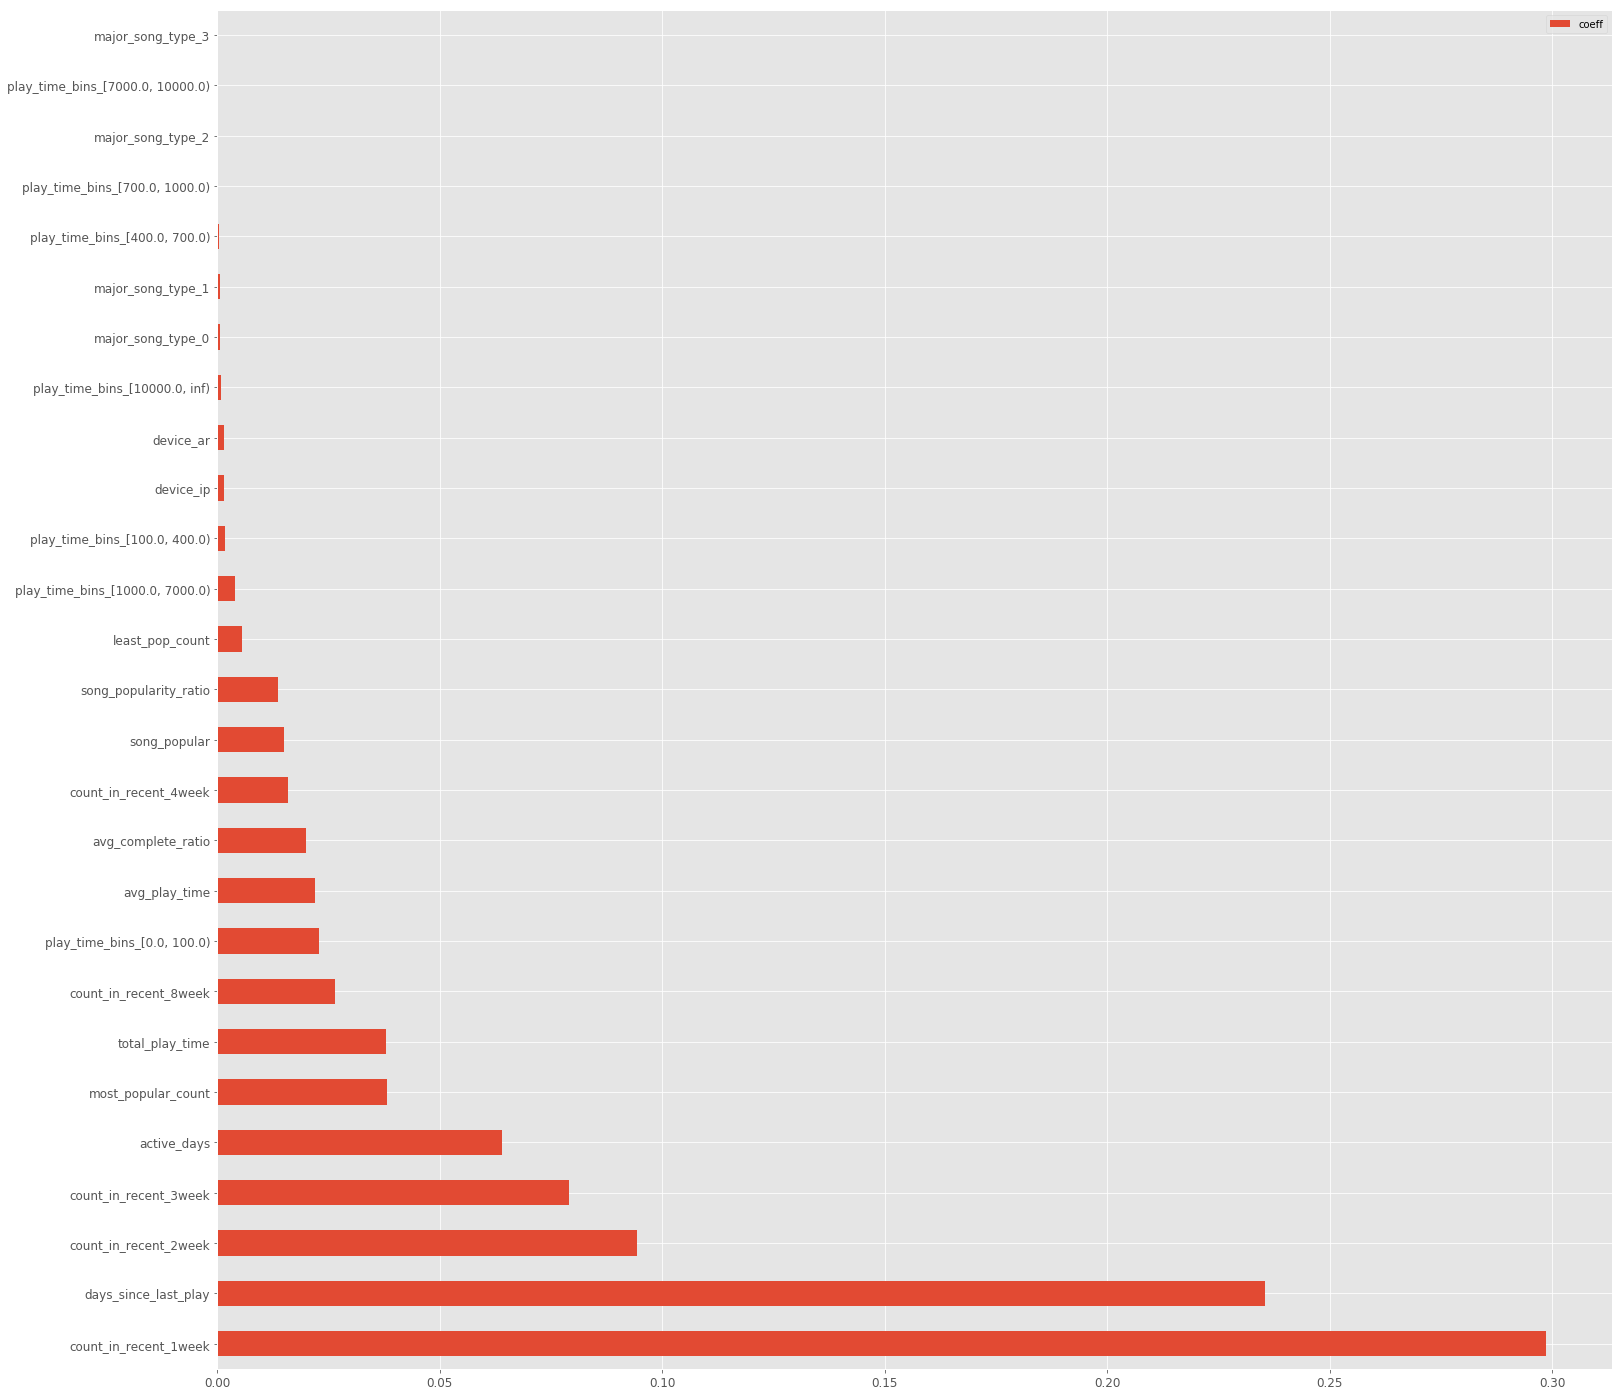

In [32]:
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
ax.tick_params(axis='both', which='major', labelsize=12)
plt.rcParams["figure.figsize"] = (25,25)
plt.show()

In [33]:
selected_features_rfc = df_coeffs.loc[df_coeffs.coeff >=0.005, 'feature']

In [34]:
selected_features_rfc = selected_features_rfc.tolist()

In [35]:
selected_features_rfc

['count_in_recent_1week',
 'days_since_last_play',
 'count_in_recent_2week',
 'count_in_recent_3week',
 'active_days',
 'most_popular_count',
 'total_play_time',
 'count_in_recent_8week',
 'play_time_bins_[0.0, 100.0)',
 'avg_play_time',
 'avg_complete_ratio',
 'count_in_recent_4week',
 'song_popular',
 'song_popularity_ratio',
 'least_pop_count']

In [36]:
df_selected_features_rfc = df.loc[:,selected_features_rfc]
df_selected_features_rfc.head()

/Users/ZhijingYe/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
/Users/ZhijingYe/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,count_in_recent_1week,days_since_last_play,count_in_recent_2week,count_in_recent_3week,active_days,most_popular_count,total_play_time,count_in_recent_8week,"play_time_bins_[0.0, 100.0)",avg_play_time,avg_complete_ratio,count_in_recent_4week,song_popular,song_popularity_ratio,least_pop_count
uid,,,,,,,,,,,,,,,
100052111,112,2,0,0,1,58.0,0.000000,0,NaN,0.000000,0.035714,0,0.107143,0.107143,0.0
100107633,0,20,0,4,1,4.0,3.033333,0,NaN,45.500000,0.222754,0,0.500000,0.500000,0.0
100223381,0,12,1,15,2,0.0,33.333333,0,NaN,125.000000,0.603366,0,0.000000,0.000000,6.0
100581940,0,23,0,0,1,17.0,17.200000,0,NaN,51.600000,0.449106,20,0.800000,0.800000,1.0
100733657,0,43,0,0,7,72.0,374.766667,115,NaN,195.530435,0.851314,0,0.434783,0.434783,0.0


In [39]:
df_selected_features_rfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150849 entries, 100052111 to 99995513 
Data columns (total 15 columns):
count_in_recent_1week          150849 non-null int64
days_since_last_play           150849 non-null int64
count_in_recent_2week          150849 non-null int64
count_in_recent_3week          150849 non-null int64
active_days                    150849 non-null int64
most_popular_count             150849 non-null float64
total_play_time                150849 non-null float64
count_in_recent_8week          150849 non-null int64
play_time_bins_[0.0, 100.0)    0 non-null float64
avg_play_time                  150849 non-null float64
avg_complete_ratio             150849 non-null float64
count_in_recent_4week          150849 non-null int64
song_popular                   150849 non-null float64
song_popularity_ratio          150849 non-null float64
least_pop_count                150849 non-null float64
dtypes: float64(8), int64(7)
memory usage: 18.4+ MB


In [40]:
#play_time_bins_[0.0, 100.0)

In [41]:
#df_selected_features_rfc = df_selected_features_rfc.drop(df_rfc_selected_features)

### Logistic Regression Model

In [42]:
from sklearn.linear_model import LogisticRegression

model_lrc = LogisticRegression(penalty = 'l2',C= 1, n_jobs = -1)

In [43]:
model_lrc.fit(X_train, y_train)
model_lrc.score(X_train, y_train), model_lrc.score(X_test, y_test)

/Users/ZhijingYe/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


(0.8631740439797716, 0.8651640702684786)

In [44]:
roc_auc_score(y_test, model_lrc.predict(X_test))

0.8201506530328428

#### Test model stability with cross validation

In [45]:
scores_lrc = cross_val_score(model_lrc, X_train, y_train, cv=5)
print scores_lrc

[0.86926464 0.86500308 0.85894218 0.86448222 0.8660858 ]


In [46]:
lrc = LogisticRegression (n_jobs = -1, random_state = 42)

In [47]:
# Tune model parameters for Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

C1 = [1e-3,1e-2,0.1,1,10,100,1000]

param_grid = [{'penalty': ['l1'], 'C': C1},
              {'penalty': ['l2'], 'C': C1}]

scores = ['accuracy']

for score in scores:
    print ("# Tuning hyper-parameters for %s" % score + "\n\n")
    cv_lrc= GridSearchCV(lrc,
                       param_grid,
                       cv = 2,
                       scoring = score)
    cv_lrc.fit(X_train[:20000, :], y_train[:20000])
    print ("Best parameters set found on ")
    print (cv_lrc.best_params_)
    print ("\nGrid scores on development set:")
    means = cv_lrc.cv_results_["mean_test_score"]
    stds = cv_lrc.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, cv_lrc.cv_results_['params']):
        print("%0.3f (+/-%0.3f) for %r"
               % (mean, std*2, params))
    print ("\nDetailed classificationi report:\n")
    print ("The model is strained on the full develpment set.")
    print ("The scores are computed on the full evaluation set.")
    print ("\n")
    y_true, y_pred = y_test, cv_lrc.predict(X_test)
    print (classification_report(y_true, y_pred))
    print ("\n")

    

# Tuning hyper-parameters for accuracy


Best parameters set found on 
{'penalty': 'l1', 'C': 100}

Grid scores on development set:
0.863 (+/-0.005) for {'penalty': 'l1', 'C': 0.001}
0.868 (+/-0.003) for {'penalty': 'l1', 'C': 0.01}
0.870 (+/-0.002) for {'penalty': 'l1', 'C': 0.1}
0.870 (+/-0.002) for {'penalty': 'l1', 'C': 1}
0.870 (+/-0.003) for {'penalty': 'l1', 'C': 10}
0.870 (+/-0.002) for {'penalty': 'l1', 'C': 100}
0.870 (+/-0.002) for {'penalty': 'l1', 'C': 1000}
0.868 (+/-0.002) for {'penalty': 'l2', 'C': 0.001}
0.867 (+/-0.001) for {'penalty': 'l2', 'C': 0.01}
0.865 (+/-0.007) for {'penalty': 'l2', 'C': 0.1}
0.868 (+/-0.003) for {'penalty': 'l2', 'C': 1}
0.867 (+/-0.004) for {'penalty': 'l2', 'C': 10}
0.866 (+/-0.006) for {'penalty': 'l2', 'C': 100}
0.867 (+/-0.000) for {'penalty': 'l2', 'C': 1000}

Detailed classificationi report:

The model is strained on the full develpment set.
The scores are computed on the full evaluation set.


             precision    recall  f1-scor

### The best parameters for Logistic Regression model are found:

{'penalty': 'l1', 'C': 10}

In [48]:
model_lrc_tuned = LogisticRegression(penalty = 'l1', C =10 , n_jobs = -1,random_state = 42)

model_lrc_tuned.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
model_lrc.score(X_train, y_train), model_lrc.score(X_test, y_test)

(0.8631740439797716, 0.8651640702684786)

In [50]:
roc_auc_score(y_test, model_lrc_tuned.predict(X_test))

0.84540752531933

In [51]:
model_lrc.coef_.shape

(1, 27)

In [52]:
model_lrc.coef_

array([[-2.06624885e-03, -2.06624885e-03,  5.40044719e-07,
         5.70758138e-07, -9.01569808e-03, -1.04955609e-03,
        -1.62259353e-02,  9.48282922e-04,  5.55177685e-04,
         2.16738241e-04,  2.94606436e-02, -6.24574257e-03,
         1.16907922e-01, -8.42288920e-02, -6.52999382e-03,
        -4.28525023e-03, -1.06168811e-02, -1.07766185e-04,
        -9.59782040e-05,  5.38141029e-06, -3.58097791e-03,
        -6.86537273e-03, -1.04450817e-03, -3.38975093e-04,
         5.20788556e-04,  1.12665821e-05,  4.82534718e-04]])

In [53]:
# Number of important features:
sum(abs(model_lrc_tuned.coef_[0])>0.1)

12

In [54]:
columns = list(df_dummies.columns)
coeffs_lrc = model_lrc_tuned.coef_[0]
df_coeffs_lrc = pd.DataFrame(list(zip(columns, coeffs_lrc))).sort_values(by=[1], ascending=False)
df_coeffs_lrc.columns = ['feature', 'coeff']
df_coeffs_lrc

,feature,coeff
26,"play_time_bins_[10000.0, inf)",9.391884e-01
19,major_song_type_3,5.302186e-01
25,"play_time_bins_[7000.0, 10000.0)",3.294564e-01
1,song_popularity_ratio,3.171882e-01
12,days_since_last_play,1.728998e-01
11,avg_complete_ratio,1.337143e-01
10,count_in_recent_8week,1.100004e-01
0,song_popular,1.088088e-01
22,"play_time_bins_[400.0, 700.0)",9.284049e-02
20,"play_time_bins_[0.0, 100.0)",8.136086e-02


In [55]:
import matplotlib.pyplot as plt

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

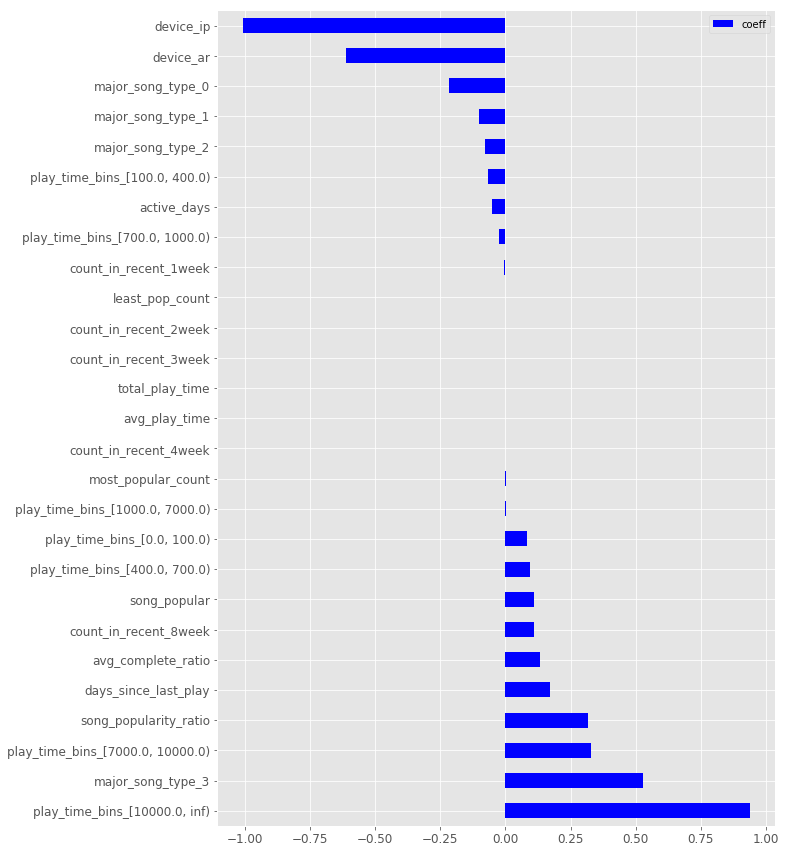

In [57]:
ax = df_coeffs_lrc.plot.barh(color = 'b')
t = df_coeffs_lrc.shape[0]
ax.set_yticklabels(df_coeffs_lrc['feature'])
ax.tick_params(axis='both', which='major', labelsize=12)
plt.rcParams["figure.figsize"] = (10,15)
plt.show()

In [58]:
# List of important features:
df_coeffs_lrc_important = df_coeffs_lrc.loc[df_coeffs_lrc['coeff'].apply(lambda x: abs(x)) >0.1]
df_coeffs_lrc_important

,feature,coeff
26,"play_time_bins_[10000.0, inf)",0.939188
19,major_song_type_3,0.530219
25,"play_time_bins_[7000.0, 10000.0)",0.329456
1,song_popularity_ratio,0.317188
12,days_since_last_play,0.172900
11,avg_complete_ratio,0.133714
10,count_in_recent_8week,0.110000
0,song_popular,0.108809
17,major_song_type_1,-0.102635
16,major_song_type_0,-0.218123


In [59]:
df_coeffs_lrc_important.shape[0]

12

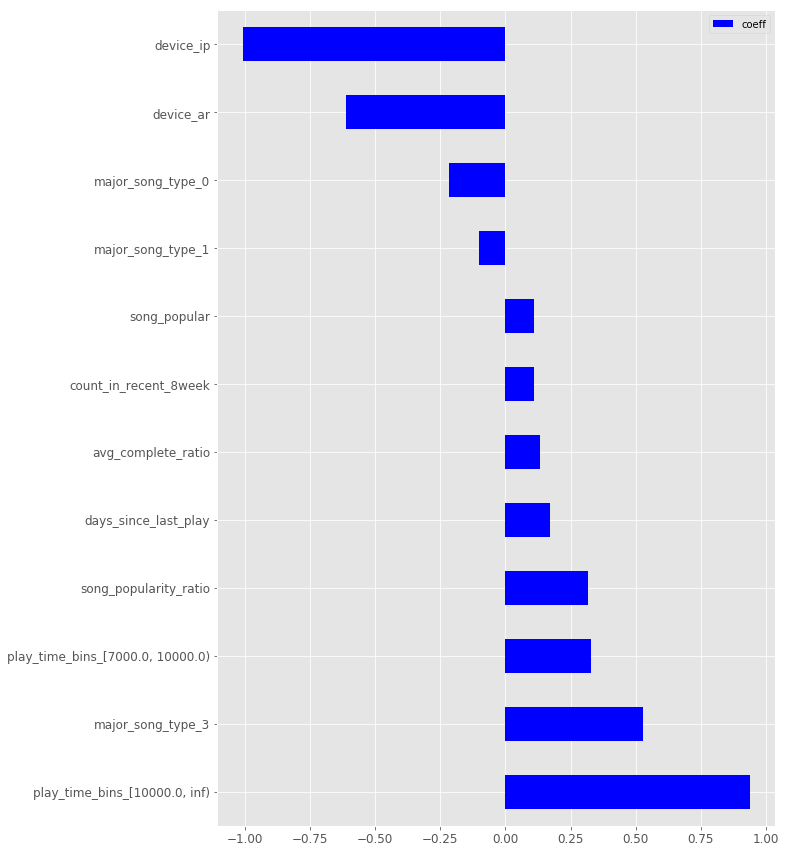

In [60]:
# Zoom in the important features:
ax = df_coeffs_lrc_important.plot.barh(color = 'b')
t = df_coeffs_lrc_important.shape[0]
ax.set_yticklabels(df_coeffs_lrc_important['feature'])
ax.tick_params(axis='both', which='major', labelsize=12)
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

In [61]:
user_profile= df_coeffs_lrc_important.feature.tolist()

In [62]:
user_profile

['play_time_bins_[10000.0, inf)',
 'major_song_type_3',
 'play_time_bins_[7000.0, 10000.0)',
 'song_popularity_ratio',
 'days_since_last_play',
 'avg_complete_ratio',
 'count_in_recent_8week',
 'song_popular',
 'major_song_type_1',
 'major_song_type_0',
 'device_ar',
 'device_ip']

In [64]:
df_user_profile = df_coeffs_lrc_important.loc()

In [65]:
df_coeffs_lrc_important.loc()

In [66]:
df_coeffs_lrc_important

,feature,coeff
26,"play_time_bins_[10000.0, inf)",0.939188
19,major_song_type_3,0.530219
25,"play_time_bins_[7000.0, 10000.0)",0.329456
1,song_popularity_ratio,0.317188
12,days_since_last_play,0.172900
11,avg_complete_ratio,0.133714
10,count_in_recent_8week,0.110000
0,song_popular,0.108809
17,major_song_type_1,-0.102635
16,major_song_type_0,-0.218123


In [67]:
df_user_profile

In [73]:
df_user_profile = df_coeffs_lrc_important.loc[:,:]
                
    
df_user_profile['odds_ratio'] = df_user_profile.coeff.apply(np.exp)


/Users/ZhijingYe/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [74]:
df_user_profile.head()

,feature,coeff,odds_ratio
26,"play_time_bins_[10000.0, inf)",0.939188,2.557905
19,major_song_type_3,0.530219,1.699304
25,"play_time_bins_[7000.0, 10000.0)",0.329456,1.390212
1,song_popularity_ratio,0.317188,1.373261
12,days_since_last_play,0.172900,1.188747


In [75]:
df_user_profile['odds_ratio'] = df_user_profile.coeff.apply(np.exp)
df_user_profile

/Users/ZhijingYe/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,feature,coeff,odds_ratio
26,"play_time_bins_[10000.0, inf)",0.939188,2.557905
19,major_song_type_3,0.530219,1.699304
25,"play_time_bins_[7000.0, 10000.0)",0.329456,1.390212
1,song_popularity_ratio,0.317188,1.373261
12,days_since_last_play,0.172900,1.188747
11,avg_complete_ratio,0.133714,1.143066
10,count_in_recent_8week,0.110000,1.116278
0,song_popular,0.108809,1.114949
17,major_song_type_1,-0.102635,0.902456
16,major_song_type_0,-0.218123,0.804027


In [76]:
df_user_profile_cate = df_user_profile.loc[df_user_profile.feature.isin(['device_ip',\
                        'no_popular_song','least_popular_count_0','all_complete']),:]
df_user_profile_cate

,feature,coeff,odds_ratio
15,device_ip,-1.009027,0.364573


In [77]:
df_user_profile['churn_proba'] = df_user_profile.odds_ratio.apply(lambda x: x/(1+x))
df_user_profile

/Users/ZhijingYe/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,feature,coeff,odds_ratio,churn_proba
26,"play_time_bins_[10000.0, inf)",0.939188,2.557905,0.718936
19,major_song_type_3,0.530219,1.699304,0.629534
25,"play_time_bins_[7000.0, 10000.0)",0.329456,1.390212,0.581627
1,song_popularity_ratio,0.317188,1.373261,0.578639
12,days_since_last_play,0.172900,1.188747,0.543118
11,avg_complete_ratio,0.133714,1.143066,0.533379
10,count_in_recent_8week,0.110000,1.116278,0.527472
0,song_popular,0.108809,1.114949,0.527175
17,major_song_type_1,-0.102635,0.902456,0.474364
16,major_song_type_0,-0.218123,0.804027,0.445684


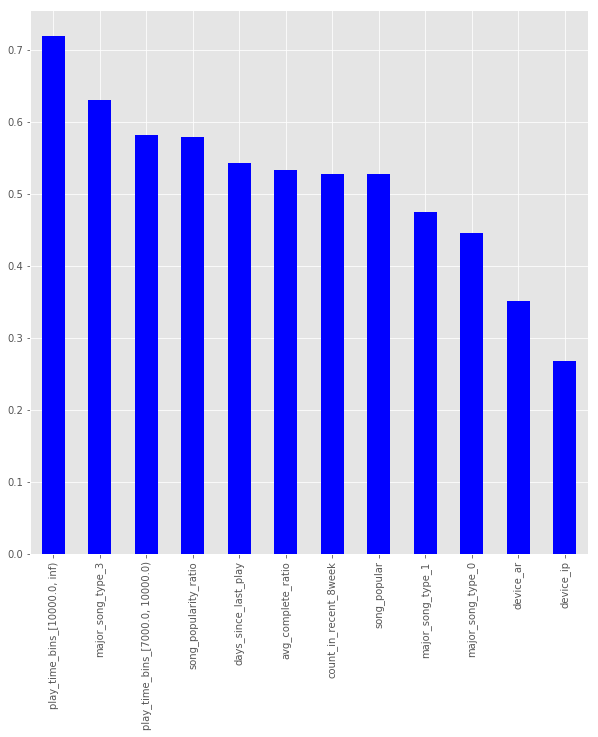

In [81]:
ax = df_user_profile.loc[:,'churn_proba'].plot.bar(color = 'b')
t = np.arange(df_user_profile.shape[0])
ax.set_xticks(t)
ax.set_xticklabels(df_user_profile['feature'],rotation = 90)
plt.rcParams["figure.figsize"] = (10,20)
plt.show()

### Profit curve

In [87]:
from sklearn.metrics import confusion_matrix

def standard_confusion_matrix(y_true, y_predict):
    """Given y and predicted y, generate standard orientation
    
    Args:
    =====
    numpy array: y_true - array of true label
    numpy array: y_predict - array of predicted label
    
    Return:
    ======:
    numpy array: confusion matrix, 2x2 numpy array
    """
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_predict)
    return np.array([[tp, fp], [fn, tn]])


def profit_curve(cost_benefit_matrix, probabilities, y_true):
    """Given cost-benefit matrix, predicted probability, 
    and true label, calculate expected profit associated with 
    each threshold.
    
    Args:
    =====
    numpy array: cost_benefit_matrix, 2x2 array
    numpy array: probabilities - array of predicted probabilities
    numpy array: y_true - array of true label
    
    Return:
    ======:
    numpy array: threshold
    numpy array: profit
    """
    thresholds = sorted(set(probabilities), reverse=True)   
    #thresholds = np.linspace(1,0,1000)
    profits = []
    i = 0
    for threshold in thresholds:
        print 'checking %dth threshold...' %i
        y_predict = probabilities > threshold
        confusion_mat = standard_confusion_matrix(y_true, y_predict)
        profit = np.sum(confusion_mat * cost_benefit_matrix) / float(len(y_true))
        profits.append(profit)
        i = i+1
    return thresholds, profits


def plot_profit_model(profits, label="Logistic Regression"):
    """Plot profits against pertentage of test instance
    """
    percentages = np.linspace(0, 100, len(profits))
    plt.plot(percentages, profits, label=label)
    plt.title("Profit Curve")
    plt.xlabel("Percentage of test instances (decreasing by score)")
    plt.ylabel("Profit")
    plt.legend(loc='best')
    plt.savefig('profit_curve.png')
    plt.show()
    
def find_best_threshold(thresholds, profits):
    """Find the best threshold that gives max profit
    
    Args:
    =====
    numpy array: thresholds - array of sorted threshold
    numpy array: profits - array of profits
    
    Return:
    ======:
    float: threshold that corresponds to max profit
    float: max profit
    """
    return thresholds[np.argmax(profits)],np.max(profits)

In [88]:
len(set(probabilities))

NameError: name 'probabilities' is not defined

In [89]:
costbenefit =  np.array([[10,-5],[-10,0]])
costbenefit 

array([[ 10,  -5],
       [-10,   0]])

                                      Confusion Matrix

|   TP   |   FP   |
|--------|--------|
|   FN   |   TN   |

In [90]:
X_test.shape

(45255, 27)

In [91]:
# Make prediction on the probabilities
probabilities = model_rfc_tuned.predict_proba(X_test)[:, 1]
probabilities.shape

(45255,)

In [92]:
probabilities[:10],y_test[:10]

(array([1.        , 0.22883972, 0.90993852, 0.8033501 , 0.06841663,
        0.91362421, 1.        , 0.99328598, 0.02469978, 0.01385552]),
 array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0]))

In [93]:
AUC = roc_auc_score(y_test, probabilities>0.5)
AUC

0.8522469992288242

In [94]:
standard_confusion_matrix(y_test, probabilities>0.5)

array([[28944,  3062],
       [ 2374, 10875]])

In [95]:
# Calculate expected profits corresponding to different threshold
thresholds, profits = profit_curve(costbenefit, probabilities, y_test)

checking 0th threshold...
checking 1th threshold...
checking 2th threshold...
checking 3th threshold...
checking 4th threshold...
checking 5th threshold...
checking 6th threshold...
checking 7th threshold...
checking 8th threshold...
checking 9th threshold...
checking 10th threshold...
checking 11th threshold...
checking 12th threshold...
checking 13th threshold...
checking 14th threshold...
checking 15th threshold...
checking 16th threshold...
checking 17th threshold...
checking 18th threshold...
checking 19th threshold...
checking 20th threshold...
checking 21th threshold...
checking 22th threshold...
checking 23th threshold...
checking 24th threshold...
checking 25th threshold...
checking 26th threshold...
checking 27th threshold...
checking 28th threshold...
checking 29th threshold...
checking 30th threshold...
checking 31th threshold...
checking 32th threshold...
checking 33th threshold...
checking 34th threshold...
checking 35th threshold...
checking 36th threshold...
checking 37

checking 297th threshold...
checking 298th threshold...
checking 299th threshold...
checking 300th threshold...
checking 301th threshold...
checking 302th threshold...
checking 303th threshold...
checking 304th threshold...
checking 305th threshold...
checking 306th threshold...
checking 307th threshold...
checking 308th threshold...
checking 309th threshold...
checking 310th threshold...
checking 311th threshold...
checking 312th threshold...
checking 313th threshold...
checking 314th threshold...
checking 315th threshold...
checking 316th threshold...
checking 317th threshold...
checking 318th threshold...
checking 319th threshold...
checking 320th threshold...
checking 321th threshold...
checking 322th threshold...
checking 323th threshold...
checking 324th threshold...
checking 325th threshold...
checking 326th threshold...
checking 327th threshold...
checking 328th threshold...
checking 329th threshold...
checking 330th threshold...
checking 331th threshold...
checking 332th thres

checking 591th threshold...
checking 592th threshold...
checking 593th threshold...
checking 594th threshold...
checking 595th threshold...
checking 596th threshold...
checking 597th threshold...
checking 598th threshold...
checking 599th threshold...
checking 600th threshold...
checking 601th threshold...
checking 602th threshold...
checking 603th threshold...
checking 604th threshold...
checking 605th threshold...
checking 606th threshold...
checking 607th threshold...
checking 608th threshold...
checking 609th threshold...
checking 610th threshold...
checking 611th threshold...
checking 612th threshold...
checking 613th threshold...
checking 614th threshold...
checking 615th threshold...
checking 616th threshold...
checking 617th threshold...
checking 618th threshold...
checking 619th threshold...
checking 620th threshold...
checking 621th threshold...
checking 622th threshold...
checking 623th threshold...
checking 624th threshold...
checking 625th threshold...
checking 626th thres

checking 885th threshold...
checking 886th threshold...
checking 887th threshold...
checking 888th threshold...
checking 889th threshold...
checking 890th threshold...
checking 891th threshold...
checking 892th threshold...
checking 893th threshold...
checking 894th threshold...
checking 895th threshold...
checking 896th threshold...
checking 897th threshold...
checking 898th threshold...
checking 899th threshold...
checking 900th threshold...
checking 901th threshold...
checking 902th threshold...
checking 903th threshold...
checking 904th threshold...
checking 905th threshold...
checking 906th threshold...
checking 907th threshold...
checking 908th threshold...
checking 909th threshold...
checking 910th threshold...
checking 911th threshold...
checking 912th threshold...
checking 913th threshold...
checking 914th threshold...
checking 915th threshold...
checking 916th threshold...
checking 917th threshold...
checking 918th threshold...
checking 919th threshold...
checking 920th thres

checking 1173th threshold...
checking 1174th threshold...
checking 1175th threshold...
checking 1176th threshold...
checking 1177th threshold...
checking 1178th threshold...
checking 1179th threshold...
checking 1180th threshold...
checking 1181th threshold...
checking 1182th threshold...
checking 1183th threshold...
checking 1184th threshold...
checking 1185th threshold...
checking 1186th threshold...
checking 1187th threshold...
checking 1188th threshold...
checking 1189th threshold...
checking 1190th threshold...
checking 1191th threshold...
checking 1192th threshold...
checking 1193th threshold...
checking 1194th threshold...
checking 1195th threshold...
checking 1196th threshold...
checking 1197th threshold...
checking 1198th threshold...
checking 1199th threshold...
checking 1200th threshold...
checking 1201th threshold...
checking 1202th threshold...
checking 1203th threshold...
checking 1204th threshold...
checking 1205th threshold...
checking 1206th threshold...
checking 1207t

checking 1457th threshold...
checking 1458th threshold...
checking 1459th threshold...
checking 1460th threshold...
checking 1461th threshold...
checking 1462th threshold...
checking 1463th threshold...
checking 1464th threshold...
checking 1465th threshold...
checking 1466th threshold...
checking 1467th threshold...
checking 1468th threshold...
checking 1469th threshold...
checking 1470th threshold...
checking 1471th threshold...
checking 1472th threshold...
checking 1473th threshold...
checking 1474th threshold...
checking 1475th threshold...
checking 1476th threshold...
checking 1477th threshold...
checking 1478th threshold...
checking 1479th threshold...
checking 1480th threshold...
checking 1481th threshold...
checking 1482th threshold...
checking 1483th threshold...
checking 1484th threshold...
checking 1485th threshold...
checking 1486th threshold...
checking 1487th threshold...
checking 1488th threshold...
checking 1489th threshold...
checking 1490th threshold...
checking 1491t

checking 1741th threshold...
checking 1742th threshold...
checking 1743th threshold...
checking 1744th threshold...
checking 1745th threshold...
checking 1746th threshold...
checking 1747th threshold...
checking 1748th threshold...
checking 1749th threshold...
checking 1750th threshold...
checking 1751th threshold...
checking 1752th threshold...
checking 1753th threshold...
checking 1754th threshold...
checking 1755th threshold...
checking 1756th threshold...
checking 1757th threshold...
checking 1758th threshold...
checking 1759th threshold...
checking 1760th threshold...
checking 1761th threshold...
checking 1762th threshold...
checking 1763th threshold...
checking 1764th threshold...
checking 1765th threshold...
checking 1766th threshold...
checking 1767th threshold...
checking 1768th threshold...
checking 1769th threshold...
checking 1770th threshold...
checking 1771th threshold...
checking 1772th threshold...
checking 1773th threshold...
checking 1774th threshold...
checking 1775t

checking 2025th threshold...
checking 2026th threshold...
checking 2027th threshold...
checking 2028th threshold...
checking 2029th threshold...
checking 2030th threshold...
checking 2031th threshold...
checking 2032th threshold...
checking 2033th threshold...
checking 2034th threshold...
checking 2035th threshold...
checking 2036th threshold...
checking 2037th threshold...
checking 2038th threshold...
checking 2039th threshold...
checking 2040th threshold...
checking 2041th threshold...
checking 2042th threshold...
checking 2043th threshold...
checking 2044th threshold...
checking 2045th threshold...
checking 2046th threshold...
checking 2047th threshold...
checking 2048th threshold...
checking 2049th threshold...
checking 2050th threshold...
checking 2051th threshold...
checking 2052th threshold...
checking 2053th threshold...
checking 2054th threshold...
checking 2055th threshold...
checking 2056th threshold...
checking 2057th threshold...
checking 2058th threshold...
checking 2059t

checking 2309th threshold...
checking 2310th threshold...
checking 2311th threshold...
checking 2312th threshold...
checking 2313th threshold...
checking 2314th threshold...
checking 2315th threshold...
checking 2316th threshold...
checking 2317th threshold...
checking 2318th threshold...
checking 2319th threshold...
checking 2320th threshold...
checking 2321th threshold...
checking 2322th threshold...
checking 2323th threshold...
checking 2324th threshold...
checking 2325th threshold...
checking 2326th threshold...
checking 2327th threshold...
checking 2328th threshold...
checking 2329th threshold...
checking 2330th threshold...
checking 2331th threshold...
checking 2332th threshold...
checking 2333th threshold...
checking 2334th threshold...
checking 2335th threshold...
checking 2336th threshold...
checking 2337th threshold...
checking 2338th threshold...
checking 2339th threshold...
checking 2340th threshold...
checking 2341th threshold...
checking 2342th threshold...
checking 2343t

checking 2593th threshold...
checking 2594th threshold...
checking 2595th threshold...
checking 2596th threshold...
checking 2597th threshold...
checking 2598th threshold...
checking 2599th threshold...
checking 2600th threshold...
checking 2601th threshold...
checking 2602th threshold...
checking 2603th threshold...
checking 2604th threshold...
checking 2605th threshold...
checking 2606th threshold...
checking 2607th threshold...
checking 2608th threshold...
checking 2609th threshold...
checking 2610th threshold...
checking 2611th threshold...
checking 2612th threshold...
checking 2613th threshold...
checking 2614th threshold...
checking 2615th threshold...
checking 2616th threshold...
checking 2617th threshold...
checking 2618th threshold...
checking 2619th threshold...
checking 2620th threshold...
checking 2621th threshold...
checking 2622th threshold...
checking 2623th threshold...
checking 2624th threshold...
checking 2625th threshold...
checking 2626th threshold...
checking 2627t

checking 2877th threshold...
checking 2878th threshold...
checking 2879th threshold...
checking 2880th threshold...
checking 2881th threshold...
checking 2882th threshold...
checking 2883th threshold...
checking 2884th threshold...
checking 2885th threshold...
checking 2886th threshold...
checking 2887th threshold...
checking 2888th threshold...
checking 2889th threshold...
checking 2890th threshold...
checking 2891th threshold...
checking 2892th threshold...
checking 2893th threshold...
checking 2894th threshold...
checking 2895th threshold...
checking 2896th threshold...
checking 2897th threshold...
checking 2898th threshold...
checking 2899th threshold...
checking 2900th threshold...
checking 2901th threshold...
checking 2902th threshold...
checking 2903th threshold...
checking 2904th threshold...
checking 2905th threshold...
checking 2906th threshold...
checking 2907th threshold...
checking 2908th threshold...
checking 2909th threshold...
checking 2910th threshold...
checking 2911t

checking 3161th threshold...
checking 3162th threshold...
checking 3163th threshold...
checking 3164th threshold...
checking 3165th threshold...
checking 3166th threshold...
checking 3167th threshold...
checking 3168th threshold...
checking 3169th threshold...
checking 3170th threshold...
checking 3171th threshold...
checking 3172th threshold...
checking 3173th threshold...
checking 3174th threshold...
checking 3175th threshold...
checking 3176th threshold...
checking 3177th threshold...
checking 3178th threshold...
checking 3179th threshold...
checking 3180th threshold...
checking 3181th threshold...
checking 3182th threshold...
checking 3183th threshold...
checking 3184th threshold...
checking 3185th threshold...
checking 3186th threshold...
checking 3187th threshold...
checking 3188th threshold...
checking 3189th threshold...
checking 3190th threshold...
checking 3191th threshold...
checking 3192th threshold...
checking 3193th threshold...
checking 3194th threshold...
checking 3195t

checking 3445th threshold...
checking 3446th threshold...
checking 3447th threshold...
checking 3448th threshold...
checking 3449th threshold...
checking 3450th threshold...
checking 3451th threshold...
checking 3452th threshold...
checking 3453th threshold...
checking 3454th threshold...
checking 3455th threshold...
checking 3456th threshold...
checking 3457th threshold...
checking 3458th threshold...
checking 3459th threshold...
checking 3460th threshold...
checking 3461th threshold...
checking 3462th threshold...
checking 3463th threshold...
checking 3464th threshold...
checking 3465th threshold...
checking 3466th threshold...
checking 3467th threshold...
checking 3468th threshold...
checking 3469th threshold...
checking 3470th threshold...
checking 3471th threshold...
checking 3472th threshold...
checking 3473th threshold...
checking 3474th threshold...
checking 3475th threshold...
checking 3476th threshold...
checking 3477th threshold...
checking 3478th threshold...
checking 3479t

checking 3729th threshold...
checking 3730th threshold...
checking 3731th threshold...
checking 3732th threshold...
checking 3733th threshold...
checking 3734th threshold...
checking 3735th threshold...
checking 3736th threshold...
checking 3737th threshold...
checking 3738th threshold...
checking 3739th threshold...
checking 3740th threshold...
checking 3741th threshold...
checking 3742th threshold...
checking 3743th threshold...
checking 3744th threshold...
checking 3745th threshold...
checking 3746th threshold...
checking 3747th threshold...
checking 3748th threshold...
checking 3749th threshold...
checking 3750th threshold...
checking 3751th threshold...
checking 3752th threshold...
checking 3753th threshold...
checking 3754th threshold...
checking 3755th threshold...
checking 3756th threshold...
checking 3757th threshold...
checking 3758th threshold...
checking 3759th threshold...
checking 3760th threshold...
checking 3761th threshold...
checking 3762th threshold...
checking 3763t

checking 4013th threshold...
checking 4014th threshold...
checking 4015th threshold...
checking 4016th threshold...
checking 4017th threshold...
checking 4018th threshold...
checking 4019th threshold...
checking 4020th threshold...
checking 4021th threshold...
checking 4022th threshold...
checking 4023th threshold...
checking 4024th threshold...
checking 4025th threshold...
checking 4026th threshold...
checking 4027th threshold...
checking 4028th threshold...
checking 4029th threshold...
checking 4030th threshold...
checking 4031th threshold...
checking 4032th threshold...
checking 4033th threshold...
checking 4034th threshold...
checking 4035th threshold...
checking 4036th threshold...
checking 4037th threshold...
checking 4038th threshold...
checking 4039th threshold...
checking 4040th threshold...
checking 4041th threshold...
checking 4042th threshold...
checking 4043th threshold...
checking 4044th threshold...
checking 4045th threshold...
checking 4046th threshold...
checking 4047t

checking 4297th threshold...
checking 4298th threshold...
checking 4299th threshold...
checking 4300th threshold...
checking 4301th threshold...
checking 4302th threshold...
checking 4303th threshold...
checking 4304th threshold...
checking 4305th threshold...
checking 4306th threshold...
checking 4307th threshold...
checking 4308th threshold...
checking 4309th threshold...
checking 4310th threshold...
checking 4311th threshold...
checking 4312th threshold...
checking 4313th threshold...
checking 4314th threshold...
checking 4315th threshold...
checking 4316th threshold...
checking 4317th threshold...
checking 4318th threshold...
checking 4319th threshold...
checking 4320th threshold...
checking 4321th threshold...
checking 4322th threshold...
checking 4323th threshold...
checking 4324th threshold...
checking 4325th threshold...
checking 4326th threshold...
checking 4327th threshold...
checking 4328th threshold...
checking 4329th threshold...
checking 4330th threshold...
checking 4331t

checking 4581th threshold...
checking 4582th threshold...
checking 4583th threshold...
checking 4584th threshold...
checking 4585th threshold...
checking 4586th threshold...
checking 4587th threshold...
checking 4588th threshold...
checking 4589th threshold...
checking 4590th threshold...
checking 4591th threshold...
checking 4592th threshold...
checking 4593th threshold...
checking 4594th threshold...
checking 4595th threshold...
checking 4596th threshold...
checking 4597th threshold...
checking 4598th threshold...
checking 4599th threshold...
checking 4600th threshold...
checking 4601th threshold...
checking 4602th threshold...
checking 4603th threshold...
checking 4604th threshold...
checking 4605th threshold...
checking 4606th threshold...
checking 4607th threshold...
checking 4608th threshold...
checking 4609th threshold...
checking 4610th threshold...
checking 4611th threshold...
checking 4612th threshold...
checking 4613th threshold...
checking 4614th threshold...
checking 4615t

checking 4865th threshold...
checking 4866th threshold...
checking 4867th threshold...
checking 4868th threshold...
checking 4869th threshold...
checking 4870th threshold...
checking 4871th threshold...
checking 4872th threshold...
checking 4873th threshold...
checking 4874th threshold...
checking 4875th threshold...
checking 4876th threshold...
checking 4877th threshold...
checking 4878th threshold...
checking 4879th threshold...
checking 4880th threshold...
checking 4881th threshold...
checking 4882th threshold...
checking 4883th threshold...
checking 4884th threshold...
checking 4885th threshold...
checking 4886th threshold...
checking 4887th threshold...
checking 4888th threshold...
checking 4889th threshold...
checking 4890th threshold...
checking 4891th threshold...
checking 4892th threshold...
checking 4893th threshold...
checking 4894th threshold...
checking 4895th threshold...
checking 4896th threshold...
checking 4897th threshold...
checking 4898th threshold...
checking 4899t

checking 5149th threshold...
checking 5150th threshold...
checking 5151th threshold...
checking 5152th threshold...
checking 5153th threshold...
checking 5154th threshold...
checking 5155th threshold...
checking 5156th threshold...
checking 5157th threshold...
checking 5158th threshold...
checking 5159th threshold...
checking 5160th threshold...
checking 5161th threshold...
checking 5162th threshold...
checking 5163th threshold...
checking 5164th threshold...
checking 5165th threshold...
checking 5166th threshold...
checking 5167th threshold...
checking 5168th threshold...
checking 5169th threshold...
checking 5170th threshold...
checking 5171th threshold...
checking 5172th threshold...
checking 5173th threshold...
checking 5174th threshold...
checking 5175th threshold...
checking 5176th threshold...
checking 5177th threshold...
checking 5178th threshold...
checking 5179th threshold...
checking 5180th threshold...
checking 5181th threshold...
checking 5182th threshold...
checking 5183t

checking 5433th threshold...
checking 5434th threshold...
checking 5435th threshold...
checking 5436th threshold...
checking 5437th threshold...
checking 5438th threshold...
checking 5439th threshold...
checking 5440th threshold...
checking 5441th threshold...
checking 5442th threshold...
checking 5443th threshold...
checking 5444th threshold...
checking 5445th threshold...
checking 5446th threshold...
checking 5447th threshold...
checking 5448th threshold...
checking 5449th threshold...
checking 5450th threshold...
checking 5451th threshold...
checking 5452th threshold...
checking 5453th threshold...
checking 5454th threshold...
checking 5455th threshold...
checking 5456th threshold...
checking 5457th threshold...
checking 5458th threshold...
checking 5459th threshold...
checking 5460th threshold...
checking 5461th threshold...
checking 5462th threshold...
checking 5463th threshold...
checking 5464th threshold...
checking 5465th threshold...
checking 5466th threshold...
checking 5467t

checking 5717th threshold...
checking 5718th threshold...
checking 5719th threshold...
checking 5720th threshold...
checking 5721th threshold...
checking 5722th threshold...
checking 5723th threshold...
checking 5724th threshold...
checking 5725th threshold...
checking 5726th threshold...
checking 5727th threshold...
checking 5728th threshold...
checking 5729th threshold...
checking 5730th threshold...
checking 5731th threshold...
checking 5732th threshold...
checking 5733th threshold...
checking 5734th threshold...
checking 5735th threshold...
checking 5736th threshold...
checking 5737th threshold...
checking 5738th threshold...
checking 5739th threshold...
checking 5740th threshold...
checking 5741th threshold...
checking 5742th threshold...
checking 5743th threshold...
checking 5744th threshold...
checking 5745th threshold...
checking 5746th threshold...
checking 5747th threshold...
checking 5748th threshold...
checking 5749th threshold...
checking 5750th threshold...
checking 5751t

checking 6001th threshold...
checking 6002th threshold...
checking 6003th threshold...
checking 6004th threshold...
checking 6005th threshold...
checking 6006th threshold...
checking 6007th threshold...
checking 6008th threshold...
checking 6009th threshold...
checking 6010th threshold...
checking 6011th threshold...
checking 6012th threshold...
checking 6013th threshold...
checking 6014th threshold...
checking 6015th threshold...
checking 6016th threshold...
checking 6017th threshold...
checking 6018th threshold...
checking 6019th threshold...
checking 6020th threshold...
checking 6021th threshold...
checking 6022th threshold...
checking 6023th threshold...
checking 6024th threshold...
checking 6025th threshold...
checking 6026th threshold...
checking 6027th threshold...
checking 6028th threshold...
checking 6029th threshold...
checking 6030th threshold...
checking 6031th threshold...
checking 6032th threshold...
checking 6033th threshold...
checking 6034th threshold...
checking 6035t

checking 6285th threshold...
checking 6286th threshold...
checking 6287th threshold...
checking 6288th threshold...
checking 6289th threshold...
checking 6290th threshold...
checking 6291th threshold...
checking 6292th threshold...
checking 6293th threshold...
checking 6294th threshold...
checking 6295th threshold...
checking 6296th threshold...
checking 6297th threshold...
checking 6298th threshold...
checking 6299th threshold...
checking 6300th threshold...
checking 6301th threshold...
checking 6302th threshold...
checking 6303th threshold...
checking 6304th threshold...
checking 6305th threshold...
checking 6306th threshold...
checking 6307th threshold...
checking 6308th threshold...
checking 6309th threshold...
checking 6310th threshold...
checking 6311th threshold...
checking 6312th threshold...
checking 6313th threshold...
checking 6314th threshold...
checking 6315th threshold...
checking 6316th threshold...
checking 6317th threshold...
checking 6318th threshold...
checking 6319t

checking 6568th threshold...
checking 6569th threshold...
checking 6570th threshold...
checking 6571th threshold...
checking 6572th threshold...
checking 6573th threshold...
checking 6574th threshold...
checking 6575th threshold...
checking 6576th threshold...
checking 6577th threshold...
checking 6578th threshold...
checking 6579th threshold...
checking 6580th threshold...
checking 6581th threshold...
checking 6582th threshold...
checking 6583th threshold...
checking 6584th threshold...
checking 6585th threshold...
checking 6586th threshold...
checking 6587th threshold...
checking 6588th threshold...
checking 6589th threshold...
checking 6590th threshold...
checking 6591th threshold...
checking 6592th threshold...
checking 6593th threshold...
checking 6594th threshold...
checking 6595th threshold...
checking 6596th threshold...
checking 6597th threshold...
checking 6598th threshold...
checking 6599th threshold...
checking 6600th threshold...
checking 6601th threshold...
checking 6602t

checking 6852th threshold...
checking 6853th threshold...
checking 6854th threshold...
checking 6855th threshold...
checking 6856th threshold...
checking 6857th threshold...
checking 6858th threshold...
checking 6859th threshold...
checking 6860th threshold...
checking 6861th threshold...
checking 6862th threshold...
checking 6863th threshold...
checking 6864th threshold...
checking 6865th threshold...
checking 6866th threshold...
checking 6867th threshold...
checking 6868th threshold...
checking 6869th threshold...
checking 6870th threshold...
checking 6871th threshold...
checking 6872th threshold...
checking 6873th threshold...
checking 6874th threshold...
checking 6875th threshold...
checking 6876th threshold...
checking 6877th threshold...
checking 6878th threshold...
checking 6879th threshold...
checking 6880th threshold...
checking 6881th threshold...
checking 6882th threshold...
checking 6883th threshold...
checking 6884th threshold...
checking 6885th threshold...
checking 6886t

checking 7136th threshold...
checking 7137th threshold...
checking 7138th threshold...
checking 7139th threshold...
checking 7140th threshold...
checking 7141th threshold...
checking 7142th threshold...
checking 7143th threshold...
checking 7144th threshold...
checking 7145th threshold...
checking 7146th threshold...
checking 7147th threshold...
checking 7148th threshold...
checking 7149th threshold...
checking 7150th threshold...
checking 7151th threshold...
checking 7152th threshold...
checking 7153th threshold...
checking 7154th threshold...
checking 7155th threshold...
checking 7156th threshold...
checking 7157th threshold...
checking 7158th threshold...
checking 7159th threshold...
checking 7160th threshold...
checking 7161th threshold...
checking 7162th threshold...
checking 7163th threshold...
checking 7164th threshold...
checking 7165th threshold...
checking 7166th threshold...
checking 7167th threshold...
checking 7168th threshold...
checking 7169th threshold...
checking 7170t

checking 7420th threshold...
checking 7421th threshold...
checking 7422th threshold...
checking 7423th threshold...
checking 7424th threshold...
checking 7425th threshold...
checking 7426th threshold...
checking 7427th threshold...
checking 7428th threshold...
checking 7429th threshold...
checking 7430th threshold...
checking 7431th threshold...
checking 7432th threshold...
checking 7433th threshold...
checking 7434th threshold...
checking 7435th threshold...
checking 7436th threshold...
checking 7437th threshold...
checking 7438th threshold...
checking 7439th threshold...
checking 7440th threshold...
checking 7441th threshold...
checking 7442th threshold...
checking 7443th threshold...
checking 7444th threshold...
checking 7445th threshold...
checking 7446th threshold...
checking 7447th threshold...
checking 7448th threshold...
checking 7449th threshold...
checking 7450th threshold...
checking 7451th threshold...
checking 7452th threshold...
checking 7453th threshold...
checking 7454t

checking 7704th threshold...
checking 7705th threshold...
checking 7706th threshold...
checking 7707th threshold...
checking 7708th threshold...
checking 7709th threshold...
checking 7710th threshold...
checking 7711th threshold...
checking 7712th threshold...
checking 7713th threshold...
checking 7714th threshold...
checking 7715th threshold...
checking 7716th threshold...
checking 7717th threshold...
checking 7718th threshold...
checking 7719th threshold...
checking 7720th threshold...
checking 7721th threshold...
checking 7722th threshold...
checking 7723th threshold...
checking 7724th threshold...
checking 7725th threshold...
checking 7726th threshold...
checking 7727th threshold...
checking 7728th threshold...
checking 7729th threshold...
checking 7730th threshold...
checking 7731th threshold...
checking 7732th threshold...
checking 7733th threshold...
checking 7734th threshold...
checking 7735th threshold...
checking 7736th threshold...
checking 7737th threshold...
checking 7738t

checking 7988th threshold...
checking 7989th threshold...
checking 7990th threshold...
checking 7991th threshold...
checking 7992th threshold...
checking 7993th threshold...
checking 7994th threshold...
checking 7995th threshold...
checking 7996th threshold...
checking 7997th threshold...
checking 7998th threshold...
checking 7999th threshold...
checking 8000th threshold...
checking 8001th threshold...
checking 8002th threshold...
checking 8003th threshold...
checking 8004th threshold...
checking 8005th threshold...
checking 8006th threshold...
checking 8007th threshold...
checking 8008th threshold...
checking 8009th threshold...
checking 8010th threshold...
checking 8011th threshold...
checking 8012th threshold...
checking 8013th threshold...
checking 8014th threshold...
checking 8015th threshold...
checking 8016th threshold...
checking 8017th threshold...
checking 8018th threshold...
checking 8019th threshold...
checking 8020th threshold...
checking 8021th threshold...
checking 8022t

checking 8272th threshold...
checking 8273th threshold...
checking 8274th threshold...
checking 8275th threshold...
checking 8276th threshold...
checking 8277th threshold...
checking 8278th threshold...
checking 8279th threshold...
checking 8280th threshold...
checking 8281th threshold...
checking 8282th threshold...
checking 8283th threshold...
checking 8284th threshold...
checking 8285th threshold...
checking 8286th threshold...
checking 8287th threshold...
checking 8288th threshold...
checking 8289th threshold...
checking 8290th threshold...
checking 8291th threshold...
checking 8292th threshold...
checking 8293th threshold...
checking 8294th threshold...
checking 8295th threshold...
checking 8296th threshold...
checking 8297th threshold...
checking 8298th threshold...
checking 8299th threshold...
checking 8300th threshold...
checking 8301th threshold...
checking 8302th threshold...
checking 8303th threshold...
checking 8304th threshold...
checking 8305th threshold...
checking 8306t

checking 8556th threshold...
checking 8557th threshold...
checking 8558th threshold...
checking 8559th threshold...
checking 8560th threshold...
checking 8561th threshold...
checking 8562th threshold...
checking 8563th threshold...
checking 8564th threshold...
checking 8565th threshold...
checking 8566th threshold...
checking 8567th threshold...
checking 8568th threshold...
checking 8569th threshold...
checking 8570th threshold...
checking 8571th threshold...
checking 8572th threshold...
checking 8573th threshold...
checking 8574th threshold...
checking 8575th threshold...
checking 8576th threshold...
checking 8577th threshold...
checking 8578th threshold...
checking 8579th threshold...
checking 8580th threshold...
checking 8581th threshold...
checking 8582th threshold...
checking 8583th threshold...
checking 8584th threshold...
checking 8585th threshold...
checking 8586th threshold...
checking 8587th threshold...
checking 8588th threshold...
checking 8589th threshold...
checking 8590t

checking 8840th threshold...
checking 8841th threshold...
checking 8842th threshold...
checking 8843th threshold...
checking 8844th threshold...
checking 8845th threshold...
checking 8846th threshold...
checking 8847th threshold...
checking 8848th threshold...
checking 8849th threshold...
checking 8850th threshold...
checking 8851th threshold...
checking 8852th threshold...
checking 8853th threshold...
checking 8854th threshold...
checking 8855th threshold...
checking 8856th threshold...
checking 8857th threshold...
checking 8858th threshold...
checking 8859th threshold...
checking 8860th threshold...
checking 8861th threshold...
checking 8862th threshold...
checking 8863th threshold...
checking 8864th threshold...
checking 8865th threshold...
checking 8866th threshold...
checking 8867th threshold...
checking 8868th threshold...
checking 8869th threshold...
checking 8870th threshold...
checking 8871th threshold...
checking 8872th threshold...
checking 8873th threshold...
checking 8874t

checking 9124th threshold...
checking 9125th threshold...
checking 9126th threshold...
checking 9127th threshold...
checking 9128th threshold...
checking 9129th threshold...
checking 9130th threshold...
checking 9131th threshold...
checking 9132th threshold...
checking 9133th threshold...
checking 9134th threshold...
checking 9135th threshold...
checking 9136th threshold...
checking 9137th threshold...
checking 9138th threshold...
checking 9139th threshold...
checking 9140th threshold...
checking 9141th threshold...
checking 9142th threshold...
checking 9143th threshold...
checking 9144th threshold...
checking 9145th threshold...
checking 9146th threshold...
checking 9147th threshold...
checking 9148th threshold...
checking 9149th threshold...
checking 9150th threshold...
checking 9151th threshold...
checking 9152th threshold...
checking 9153th threshold...
checking 9154th threshold...
checking 9155th threshold...
checking 9156th threshold...
checking 9157th threshold...
checking 9158t

checking 9408th threshold...
checking 9409th threshold...
checking 9410th threshold...
checking 9411th threshold...
checking 9412th threshold...
checking 9413th threshold...
checking 9414th threshold...
checking 9415th threshold...
checking 9416th threshold...
checking 9417th threshold...
checking 9418th threshold...
checking 9419th threshold...
checking 9420th threshold...
checking 9421th threshold...
checking 9422th threshold...
checking 9423th threshold...
checking 9424th threshold...
checking 9425th threshold...
checking 9426th threshold...
checking 9427th threshold...
checking 9428th threshold...
checking 9429th threshold...
checking 9430th threshold...
checking 9431th threshold...
checking 9432th threshold...
checking 9433th threshold...
checking 9434th threshold...
checking 9435th threshold...
checking 9436th threshold...
checking 9437th threshold...
checking 9438th threshold...
checking 9439th threshold...
checking 9440th threshold...
checking 9441th threshold...
checking 9442t

checking 9692th threshold...
checking 9693th threshold...
checking 9694th threshold...
checking 9695th threshold...
checking 9696th threshold...
checking 9697th threshold...
checking 9698th threshold...
checking 9699th threshold...
checking 9700th threshold...
checking 9701th threshold...
checking 9702th threshold...
checking 9703th threshold...
checking 9704th threshold...
checking 9705th threshold...
checking 9706th threshold...
checking 9707th threshold...
checking 9708th threshold...
checking 9709th threshold...
checking 9710th threshold...
checking 9711th threshold...
checking 9712th threshold...
checking 9713th threshold...
checking 9714th threshold...
checking 9715th threshold...
checking 9716th threshold...
checking 9717th threshold...
checking 9718th threshold...
checking 9719th threshold...
checking 9720th threshold...
checking 9721th threshold...
checking 9722th threshold...
checking 9723th threshold...
checking 9724th threshold...
checking 9725th threshold...
checking 9726t

checking 9976th threshold...
checking 9977th threshold...
checking 9978th threshold...
checking 9979th threshold...
checking 9980th threshold...
checking 9981th threshold...
checking 9982th threshold...
checking 9983th threshold...
checking 9984th threshold...
checking 9985th threshold...
checking 9986th threshold...
checking 9987th threshold...
checking 9988th threshold...
checking 9989th threshold...
checking 9990th threshold...
checking 9991th threshold...
checking 9992th threshold...
checking 9993th threshold...
checking 9994th threshold...
checking 9995th threshold...
checking 9996th threshold...
checking 9997th threshold...
checking 9998th threshold...
checking 9999th threshold...
checking 10000th threshold...
checking 10001th threshold...
checking 10002th threshold...
checking 10003th threshold...
checking 10004th threshold...
checking 10005th threshold...
checking 10006th threshold...
checking 10007th threshold...
checking 10008th threshold...
checking 10009th threshold...
chec

checking 10250th threshold...
checking 10251th threshold...
checking 10252th threshold...
checking 10253th threshold...
checking 10254th threshold...
checking 10255th threshold...
checking 10256th threshold...
checking 10257th threshold...
checking 10258th threshold...
checking 10259th threshold...
checking 10260th threshold...
checking 10261th threshold...
checking 10262th threshold...
checking 10263th threshold...
checking 10264th threshold...
checking 10265th threshold...
checking 10266th threshold...
checking 10267th threshold...
checking 10268th threshold...
checking 10269th threshold...
checking 10270th threshold...
checking 10271th threshold...
checking 10272th threshold...
checking 10273th threshold...
checking 10274th threshold...
checking 10275th threshold...
checking 10276th threshold...
checking 10277th threshold...
checking 10278th threshold...
checking 10279th threshold...
checking 10280th threshold...
checking 10281th threshold...
checking 10282th threshold...
checking 1

checking 10524th threshold...
checking 10525th threshold...
checking 10526th threshold...
checking 10527th threshold...
checking 10528th threshold...
checking 10529th threshold...
checking 10530th threshold...
checking 10531th threshold...
checking 10532th threshold...
checking 10533th threshold...
checking 10534th threshold...
checking 10535th threshold...
checking 10536th threshold...
checking 10537th threshold...
checking 10538th threshold...
checking 10539th threshold...
checking 10540th threshold...
checking 10541th threshold...
checking 10542th threshold...
checking 10543th threshold...
checking 10544th threshold...
checking 10545th threshold...
checking 10546th threshold...
checking 10547th threshold...
checking 10548th threshold...
checking 10549th threshold...
checking 10550th threshold...
checking 10551th threshold...
checking 10552th threshold...
checking 10553th threshold...
checking 10554th threshold...
checking 10555th threshold...
checking 10556th threshold...
checking 1

checking 10798th threshold...
checking 10799th threshold...
checking 10800th threshold...
checking 10801th threshold...
checking 10802th threshold...
checking 10803th threshold...
checking 10804th threshold...
checking 10805th threshold...
checking 10806th threshold...
checking 10807th threshold...
checking 10808th threshold...
checking 10809th threshold...
checking 10810th threshold...
checking 10811th threshold...
checking 10812th threshold...
checking 10813th threshold...
checking 10814th threshold...
checking 10815th threshold...
checking 10816th threshold...
checking 10817th threshold...
checking 10818th threshold...
checking 10819th threshold...
checking 10820th threshold...
checking 10821th threshold...
checking 10822th threshold...
checking 10823th threshold...
checking 10824th threshold...
checking 10825th threshold...
checking 10826th threshold...
checking 10827th threshold...
checking 10828th threshold...
checking 10829th threshold...
checking 10830th threshold...
checking 1

checking 11072th threshold...
checking 11073th threshold...
checking 11074th threshold...
checking 11075th threshold...
checking 11076th threshold...
checking 11077th threshold...
checking 11078th threshold...
checking 11079th threshold...
checking 11080th threshold...
checking 11081th threshold...
checking 11082th threshold...
checking 11083th threshold...
checking 11084th threshold...
checking 11085th threshold...
checking 11086th threshold...
checking 11087th threshold...
checking 11088th threshold...
checking 11089th threshold...
checking 11090th threshold...
checking 11091th threshold...
checking 11092th threshold...
checking 11093th threshold...
checking 11094th threshold...
checking 11095th threshold...
checking 11096th threshold...
checking 11097th threshold...
checking 11098th threshold...
checking 11099th threshold...
checking 11100th threshold...
checking 11101th threshold...
checking 11102th threshold...
checking 11103th threshold...
checking 11104th threshold...
checking 1

checking 11346th threshold...
checking 11347th threshold...
checking 11348th threshold...
checking 11349th threshold...
checking 11350th threshold...
checking 11351th threshold...
checking 11352th threshold...
checking 11353th threshold...
checking 11354th threshold...
checking 11355th threshold...
checking 11356th threshold...
checking 11357th threshold...
checking 11358th threshold...
checking 11359th threshold...
checking 11360th threshold...
checking 11361th threshold...
checking 11362th threshold...
checking 11363th threshold...
checking 11364th threshold...
checking 11365th threshold...
checking 11366th threshold...
checking 11367th threshold...
checking 11368th threshold...
checking 11369th threshold...
checking 11370th threshold...
checking 11371th threshold...
checking 11372th threshold...
checking 11373th threshold...
checking 11374th threshold...
checking 11375th threshold...
checking 11376th threshold...
checking 11377th threshold...
checking 11378th threshold...
checking 1

checking 11620th threshold...
checking 11621th threshold...
checking 11622th threshold...
checking 11623th threshold...
checking 11624th threshold...
checking 11625th threshold...
checking 11626th threshold...
checking 11627th threshold...
checking 11628th threshold...
checking 11629th threshold...
checking 11630th threshold...
checking 11631th threshold...
checking 11632th threshold...
checking 11633th threshold...
checking 11634th threshold...
checking 11635th threshold...
checking 11636th threshold...
checking 11637th threshold...
checking 11638th threshold...
checking 11639th threshold...
checking 11640th threshold...
checking 11641th threshold...
checking 11642th threshold...
checking 11643th threshold...
checking 11644th threshold...
checking 11645th threshold...
checking 11646th threshold...
checking 11647th threshold...
checking 11648th threshold...
checking 11649th threshold...
checking 11650th threshold...
checking 11651th threshold...
checking 11652th threshold...
checking 1

checking 11894th threshold...
checking 11895th threshold...
checking 11896th threshold...
checking 11897th threshold...
checking 11898th threshold...
checking 11899th threshold...
checking 11900th threshold...
checking 11901th threshold...
checking 11902th threshold...
checking 11903th threshold...
checking 11904th threshold...
checking 11905th threshold...
checking 11906th threshold...
checking 11907th threshold...
checking 11908th threshold...
checking 11909th threshold...
checking 11910th threshold...
checking 11911th threshold...
checking 11912th threshold...
checking 11913th threshold...
checking 11914th threshold...
checking 11915th threshold...
checking 11916th threshold...
checking 11917th threshold...
checking 11918th threshold...
checking 11919th threshold...
checking 11920th threshold...
checking 11921th threshold...
checking 11922th threshold...
checking 11923th threshold...
checking 11924th threshold...
checking 11925th threshold...
checking 11926th threshold...
checking 1

checking 12168th threshold...
checking 12169th threshold...
checking 12170th threshold...
checking 12171th threshold...
checking 12172th threshold...
checking 12173th threshold...
checking 12174th threshold...
checking 12175th threshold...
checking 12176th threshold...
checking 12177th threshold...
checking 12178th threshold...
checking 12179th threshold...
checking 12180th threshold...
checking 12181th threshold...
checking 12182th threshold...
checking 12183th threshold...
checking 12184th threshold...
checking 12185th threshold...
checking 12186th threshold...
checking 12187th threshold...
checking 12188th threshold...
checking 12189th threshold...
checking 12190th threshold...
checking 12191th threshold...
checking 12192th threshold...
checking 12193th threshold...
checking 12194th threshold...
checking 12195th threshold...
checking 12196th threshold...
checking 12197th threshold...
checking 12198th threshold...
checking 12199th threshold...
checking 12200th threshold...
checking 1

checking 12442th threshold...
checking 12443th threshold...
checking 12444th threshold...
checking 12445th threshold...
checking 12446th threshold...
checking 12447th threshold...
checking 12448th threshold...
checking 12449th threshold...
checking 12450th threshold...
checking 12451th threshold...
checking 12452th threshold...
checking 12453th threshold...
checking 12454th threshold...
checking 12455th threshold...
checking 12456th threshold...
checking 12457th threshold...
checking 12458th threshold...
checking 12459th threshold...
checking 12460th threshold...
checking 12461th threshold...
checking 12462th threshold...
checking 12463th threshold...
checking 12464th threshold...
checking 12465th threshold...
checking 12466th threshold...
checking 12467th threshold...
checking 12468th threshold...
checking 12469th threshold...
checking 12470th threshold...
checking 12471th threshold...
checking 12472th threshold...
checking 12473th threshold...
checking 12474th threshold...
checking 1

checking 12716th threshold...
checking 12717th threshold...
checking 12718th threshold...
checking 12719th threshold...
checking 12720th threshold...
checking 12721th threshold...
checking 12722th threshold...
checking 12723th threshold...
checking 12724th threshold...
checking 12725th threshold...
checking 12726th threshold...
checking 12727th threshold...
checking 12728th threshold...
checking 12729th threshold...
checking 12730th threshold...
checking 12731th threshold...
checking 12732th threshold...
checking 12733th threshold...
checking 12734th threshold...
checking 12735th threshold...
checking 12736th threshold...
checking 12737th threshold...
checking 12738th threshold...
checking 12739th threshold...
checking 12740th threshold...
checking 12741th threshold...
checking 12742th threshold...
checking 12743th threshold...
checking 12744th threshold...
checking 12745th threshold...
checking 12746th threshold...
checking 12747th threshold...
checking 12748th threshold...
checking 1

checking 12990th threshold...
checking 12991th threshold...
checking 12992th threshold...
checking 12993th threshold...
checking 12994th threshold...
checking 12995th threshold...
checking 12996th threshold...
checking 12997th threshold...
checking 12998th threshold...
checking 12999th threshold...
checking 13000th threshold...
checking 13001th threshold...
checking 13002th threshold...
checking 13003th threshold...
checking 13004th threshold...
checking 13005th threshold...
checking 13006th threshold...
checking 13007th threshold...
checking 13008th threshold...
checking 13009th threshold...
checking 13010th threshold...
checking 13011th threshold...
checking 13012th threshold...
checking 13013th threshold...
checking 13014th threshold...
checking 13015th threshold...
checking 13016th threshold...
checking 13017th threshold...
checking 13018th threshold...
checking 13019th threshold...
checking 13020th threshold...
checking 13021th threshold...
checking 13022th threshold...
checking 1

checking 13264th threshold...
checking 13265th threshold...
checking 13266th threshold...
checking 13267th threshold...
checking 13268th threshold...
checking 13269th threshold...
checking 13270th threshold...
checking 13271th threshold...
checking 13272th threshold...
checking 13273th threshold...
checking 13274th threshold...
checking 13275th threshold...
checking 13276th threshold...
checking 13277th threshold...
checking 13278th threshold...
checking 13279th threshold...
checking 13280th threshold...
checking 13281th threshold...
checking 13282th threshold...
checking 13283th threshold...
checking 13284th threshold...
checking 13285th threshold...
checking 13286th threshold...
checking 13287th threshold...
checking 13288th threshold...
checking 13289th threshold...
checking 13290th threshold...
checking 13291th threshold...
checking 13292th threshold...
checking 13293th threshold...
checking 13294th threshold...
checking 13295th threshold...
checking 13296th threshold...
checking 1

checking 13538th threshold...
checking 13539th threshold...
checking 13540th threshold...
checking 13541th threshold...
checking 13542th threshold...
checking 13543th threshold...
checking 13544th threshold...
checking 13545th threshold...
checking 13546th threshold...
checking 13547th threshold...
checking 13548th threshold...
checking 13549th threshold...
checking 13550th threshold...
checking 13551th threshold...
checking 13552th threshold...
checking 13553th threshold...
checking 13554th threshold...
checking 13555th threshold...
checking 13556th threshold...
checking 13557th threshold...
checking 13558th threshold...
checking 13559th threshold...
checking 13560th threshold...
checking 13561th threshold...
checking 13562th threshold...
checking 13563th threshold...
checking 13564th threshold...
checking 13565th threshold...
checking 13566th threshold...
checking 13567th threshold...
checking 13568th threshold...
checking 13569th threshold...
checking 13570th threshold...
checking 1

checking 13812th threshold...
checking 13813th threshold...
checking 13814th threshold...
checking 13815th threshold...
checking 13816th threshold...
checking 13817th threshold...
checking 13818th threshold...
checking 13819th threshold...
checking 13820th threshold...
checking 13821th threshold...
checking 13822th threshold...
checking 13823th threshold...
checking 13824th threshold...
checking 13825th threshold...
checking 13826th threshold...
checking 13827th threshold...
checking 13828th threshold...
checking 13829th threshold...
checking 13830th threshold...
checking 13831th threshold...
checking 13832th threshold...
checking 13833th threshold...
checking 13834th threshold...
checking 13835th threshold...
checking 13836th threshold...
checking 13837th threshold...
checking 13838th threshold...
checking 13839th threshold...
checking 13840th threshold...
checking 13841th threshold...
checking 13842th threshold...
checking 13843th threshold...
checking 13844th threshold...
checking 1

checking 14086th threshold...
checking 14087th threshold...
checking 14088th threshold...
checking 14089th threshold...
checking 14090th threshold...
checking 14091th threshold...
checking 14092th threshold...
checking 14093th threshold...
checking 14094th threshold...
checking 14095th threshold...
checking 14096th threshold...
checking 14097th threshold...
checking 14098th threshold...
checking 14099th threshold...
checking 14100th threshold...
checking 14101th threshold...
checking 14102th threshold...
checking 14103th threshold...
checking 14104th threshold...
checking 14105th threshold...
checking 14106th threshold...
checking 14107th threshold...
checking 14108th threshold...
checking 14109th threshold...
checking 14110th threshold...
checking 14111th threshold...
checking 14112th threshold...
checking 14113th threshold...
checking 14114th threshold...
checking 14115th threshold...
checking 14116th threshold...
checking 14117th threshold...
checking 14118th threshold...
checking 1

checking 14360th threshold...
checking 14361th threshold...
checking 14362th threshold...
checking 14363th threshold...
checking 14364th threshold...
checking 14365th threshold...
checking 14366th threshold...
checking 14367th threshold...
checking 14368th threshold...
checking 14369th threshold...
checking 14370th threshold...
checking 14371th threshold...
checking 14372th threshold...
checking 14373th threshold...
checking 14374th threshold...
checking 14375th threshold...
checking 14376th threshold...
checking 14377th threshold...
checking 14378th threshold...
checking 14379th threshold...
checking 14380th threshold...
checking 14381th threshold...
checking 14382th threshold...
checking 14383th threshold...
checking 14384th threshold...
checking 14385th threshold...
checking 14386th threshold...
checking 14387th threshold...
checking 14388th threshold...
checking 14389th threshold...
checking 14390th threshold...
checking 14391th threshold...
checking 14392th threshold...
checking 1

checking 14634th threshold...
checking 14635th threshold...
checking 14636th threshold...
checking 14637th threshold...
checking 14638th threshold...
checking 14639th threshold...
checking 14640th threshold...
checking 14641th threshold...
checking 14642th threshold...
checking 14643th threshold...
checking 14644th threshold...
checking 14645th threshold...
checking 14646th threshold...
checking 14647th threshold...
checking 14648th threshold...
checking 14649th threshold...
checking 14650th threshold...
checking 14651th threshold...
checking 14652th threshold...
checking 14653th threshold...
checking 14654th threshold...
checking 14655th threshold...
checking 14656th threshold...
checking 14657th threshold...
checking 14658th threshold...
checking 14659th threshold...
checking 14660th threshold...
checking 14661th threshold...
checking 14662th threshold...
checking 14663th threshold...
checking 14664th threshold...
checking 14665th threshold...
checking 14666th threshold...
checking 1

checking 14908th threshold...
checking 14909th threshold...
checking 14910th threshold...
checking 14911th threshold...
checking 14912th threshold...
checking 14913th threshold...
checking 14914th threshold...
checking 14915th threshold...
checking 14916th threshold...
checking 14917th threshold...
checking 14918th threshold...
checking 14919th threshold...
checking 14920th threshold...
checking 14921th threshold...
checking 14922th threshold...
checking 14923th threshold...
checking 14924th threshold...
checking 14925th threshold...
checking 14926th threshold...
checking 14927th threshold...
checking 14928th threshold...
checking 14929th threshold...
checking 14930th threshold...
checking 14931th threshold...
checking 14932th threshold...
checking 14933th threshold...
checking 14934th threshold...
checking 14935th threshold...
checking 14936th threshold...
checking 14937th threshold...
checking 14938th threshold...
checking 14939th threshold...
checking 14940th threshold...
checking 1

checking 15182th threshold...
checking 15183th threshold...
checking 15184th threshold...
checking 15185th threshold...
checking 15186th threshold...
checking 15187th threshold...
checking 15188th threshold...
checking 15189th threshold...
checking 15190th threshold...
checking 15191th threshold...
checking 15192th threshold...
checking 15193th threshold...
checking 15194th threshold...
checking 15195th threshold...
checking 15196th threshold...
checking 15197th threshold...
checking 15198th threshold...
checking 15199th threshold...
checking 15200th threshold...
checking 15201th threshold...
checking 15202th threshold...
checking 15203th threshold...
checking 15204th threshold...
checking 15205th threshold...
checking 15206th threshold...
checking 15207th threshold...
checking 15208th threshold...
checking 15209th threshold...
checking 15210th threshold...
checking 15211th threshold...
checking 15212th threshold...
checking 15213th threshold...
checking 15214th threshold...
checking 1

checking 15456th threshold...
checking 15457th threshold...
checking 15458th threshold...
checking 15459th threshold...
checking 15460th threshold...
checking 15461th threshold...
checking 15462th threshold...
checking 15463th threshold...
checking 15464th threshold...
checking 15465th threshold...
checking 15466th threshold...
checking 15467th threshold...
checking 15468th threshold...
checking 15469th threshold...
checking 15470th threshold...
checking 15471th threshold...
checking 15472th threshold...
checking 15473th threshold...
checking 15474th threshold...
checking 15475th threshold...
checking 15476th threshold...
checking 15477th threshold...
checking 15478th threshold...
checking 15479th threshold...
checking 15480th threshold...
checking 15481th threshold...
checking 15482th threshold...
checking 15483th threshold...
checking 15484th threshold...
checking 15485th threshold...
checking 15486th threshold...
checking 15487th threshold...
checking 15488th threshold...
checking 1

checking 15730th threshold...
checking 15731th threshold...
checking 15732th threshold...
checking 15733th threshold...
checking 15734th threshold...
checking 15735th threshold...
checking 15736th threshold...
checking 15737th threshold...
checking 15738th threshold...
checking 15739th threshold...
checking 15740th threshold...
checking 15741th threshold...
checking 15742th threshold...
checking 15743th threshold...
checking 15744th threshold...
checking 15745th threshold...
checking 15746th threshold...
checking 15747th threshold...
checking 15748th threshold...
checking 15749th threshold...
checking 15750th threshold...
checking 15751th threshold...
checking 15752th threshold...
checking 15753th threshold...
checking 15754th threshold...
checking 15755th threshold...
checking 15756th threshold...
checking 15757th threshold...
checking 15758th threshold...
checking 15759th threshold...
checking 15760th threshold...
checking 15761th threshold...
checking 15762th threshold...
checking 1

checking 16004th threshold...
checking 16005th threshold...
checking 16006th threshold...
checking 16007th threshold...
checking 16008th threshold...
checking 16009th threshold...
checking 16010th threshold...
checking 16011th threshold...
checking 16012th threshold...
checking 16013th threshold...
checking 16014th threshold...
checking 16015th threshold...
checking 16016th threshold...
checking 16017th threshold...
checking 16018th threshold...
checking 16019th threshold...
checking 16020th threshold...
checking 16021th threshold...
checking 16022th threshold...
checking 16023th threshold...
checking 16024th threshold...
checking 16025th threshold...
checking 16026th threshold...
checking 16027th threshold...
checking 16028th threshold...
checking 16029th threshold...
checking 16030th threshold...
checking 16031th threshold...
checking 16032th threshold...
checking 16033th threshold...
checking 16034th threshold...
checking 16035th threshold...
checking 16036th threshold...
checking 1

checking 16278th threshold...
checking 16279th threshold...
checking 16280th threshold...
checking 16281th threshold...
checking 16282th threshold...
checking 16283th threshold...
checking 16284th threshold...
checking 16285th threshold...
checking 16286th threshold...
checking 16287th threshold...
checking 16288th threshold...
checking 16289th threshold...
checking 16290th threshold...
checking 16291th threshold...
checking 16292th threshold...
checking 16293th threshold...
checking 16294th threshold...
checking 16295th threshold...
checking 16296th threshold...
checking 16297th threshold...
checking 16298th threshold...
checking 16299th threshold...
checking 16300th threshold...
checking 16301th threshold...
checking 16302th threshold...
checking 16303th threshold...
checking 16304th threshold...
checking 16305th threshold...
checking 16306th threshold...
checking 16307th threshold...
checking 16308th threshold...
checking 16309th threshold...
checking 16310th threshold...
checking 1

checking 16552th threshold...
checking 16553th threshold...
checking 16554th threshold...
checking 16555th threshold...
checking 16556th threshold...
checking 16557th threshold...
checking 16558th threshold...
checking 16559th threshold...
checking 16560th threshold...
checking 16561th threshold...
checking 16562th threshold...
checking 16563th threshold...
checking 16564th threshold...
checking 16565th threshold...
checking 16566th threshold...
checking 16567th threshold...
checking 16568th threshold...
checking 16569th threshold...
checking 16570th threshold...
checking 16571th threshold...
checking 16572th threshold...
checking 16573th threshold...
checking 16574th threshold...
checking 16575th threshold...
checking 16576th threshold...
checking 16577th threshold...
checking 16578th threshold...
checking 16579th threshold...
checking 16580th threshold...
checking 16581th threshold...
checking 16582th threshold...
checking 16583th threshold...
checking 16584th threshold...
checking 1

checking 16826th threshold...
checking 16827th threshold...
checking 16828th threshold...
checking 16829th threshold...
checking 16830th threshold...
checking 16831th threshold...
checking 16832th threshold...
checking 16833th threshold...
checking 16834th threshold...
checking 16835th threshold...
checking 16836th threshold...
checking 16837th threshold...
checking 16838th threshold...
checking 16839th threshold...
checking 16840th threshold...
checking 16841th threshold...
checking 16842th threshold...
checking 16843th threshold...
checking 16844th threshold...
checking 16845th threshold...
checking 16846th threshold...
checking 16847th threshold...
checking 16848th threshold...
checking 16849th threshold...
checking 16850th threshold...
checking 16851th threshold...
checking 16852th threshold...
checking 16853th threshold...
checking 16854th threshold...
checking 16855th threshold...
checking 16856th threshold...
checking 16857th threshold...
checking 16858th threshold...
checking 1

checking 17100th threshold...
checking 17101th threshold...
checking 17102th threshold...
checking 17103th threshold...
checking 17104th threshold...
checking 17105th threshold...
checking 17106th threshold...
checking 17107th threshold...
checking 17108th threshold...
checking 17109th threshold...
checking 17110th threshold...
checking 17111th threshold...
checking 17112th threshold...
checking 17113th threshold...
checking 17114th threshold...
checking 17115th threshold...
checking 17116th threshold...
checking 17117th threshold...
checking 17118th threshold...
checking 17119th threshold...
checking 17120th threshold...
checking 17121th threshold...
checking 17122th threshold...
checking 17123th threshold...
checking 17124th threshold...
checking 17125th threshold...
checking 17126th threshold...
checking 17127th threshold...
checking 17128th threshold...
checking 17129th threshold...
checking 17130th threshold...
checking 17131th threshold...
checking 17132th threshold...
checking 1

checking 17374th threshold...
checking 17375th threshold...
checking 17376th threshold...
checking 17377th threshold...
checking 17378th threshold...
checking 17379th threshold...
checking 17380th threshold...
checking 17381th threshold...
checking 17382th threshold...
checking 17383th threshold...
checking 17384th threshold...
checking 17385th threshold...
checking 17386th threshold...
checking 17387th threshold...
checking 17388th threshold...
checking 17389th threshold...
checking 17390th threshold...
checking 17391th threshold...
checking 17392th threshold...
checking 17393th threshold...
checking 17394th threshold...
checking 17395th threshold...
checking 17396th threshold...
checking 17397th threshold...
checking 17398th threshold...
checking 17399th threshold...
checking 17400th threshold...
checking 17401th threshold...
checking 17402th threshold...
checking 17403th threshold...
checking 17404th threshold...
checking 17405th threshold...
checking 17406th threshold...
checking 1

checking 17649th threshold...
checking 17650th threshold...
checking 17651th threshold...
checking 17652th threshold...
checking 17653th threshold...
checking 17654th threshold...
checking 17655th threshold...
checking 17656th threshold...
checking 17657th threshold...
checking 17658th threshold...
checking 17659th threshold...
checking 17660th threshold...
checking 17661th threshold...
checking 17662th threshold...
checking 17663th threshold...
checking 17664th threshold...
checking 17665th threshold...
checking 17666th threshold...
checking 17667th threshold...
checking 17668th threshold...
checking 17669th threshold...
checking 17670th threshold...
checking 17671th threshold...
checking 17672th threshold...
checking 17673th threshold...
checking 17674th threshold...
checking 17675th threshold...
checking 17676th threshold...
checking 17677th threshold...
checking 17678th threshold...
checking 17679th threshold...
checking 17680th threshold...
checking 17681th threshold...
checking 1

checking 17923th threshold...
checking 17924th threshold...
checking 17925th threshold...
checking 17926th threshold...
checking 17927th threshold...
checking 17928th threshold...
checking 17929th threshold...
checking 17930th threshold...
checking 17931th threshold...
checking 17932th threshold...
checking 17933th threshold...
checking 17934th threshold...
checking 17935th threshold...
checking 17936th threshold...
checking 17937th threshold...
checking 17938th threshold...
checking 17939th threshold...
checking 17940th threshold...
checking 17941th threshold...
checking 17942th threshold...
checking 17943th threshold...
checking 17944th threshold...
checking 17945th threshold...
checking 17946th threshold...
checking 17947th threshold...
checking 17948th threshold...
checking 17949th threshold...
checking 17950th threshold...
checking 17951th threshold...
checking 17952th threshold...
checking 17953th threshold...
checking 17954th threshold...
checking 17955th threshold...
checking 1

checking 18198th threshold...
checking 18199th threshold...
checking 18200th threshold...
checking 18201th threshold...
checking 18202th threshold...
checking 18203th threshold...
checking 18204th threshold...
checking 18205th threshold...
checking 18206th threshold...
checking 18207th threshold...
checking 18208th threshold...
checking 18209th threshold...
checking 18210th threshold...
checking 18211th threshold...
checking 18212th threshold...
checking 18213th threshold...
checking 18214th threshold...
checking 18215th threshold...
checking 18216th threshold...
checking 18217th threshold...
checking 18218th threshold...
checking 18219th threshold...
checking 18220th threshold...
checking 18221th threshold...
checking 18222th threshold...
checking 18223th threshold...
checking 18224th threshold...
checking 18225th threshold...
checking 18226th threshold...
checking 18227th threshold...
checking 18228th threshold...
checking 18229th threshold...
checking 18230th threshold...
checking 1

checking 18472th threshold...
checking 18473th threshold...
checking 18474th threshold...
checking 18475th threshold...
checking 18476th threshold...
checking 18477th threshold...
checking 18478th threshold...
checking 18479th threshold...
checking 18480th threshold...
checking 18481th threshold...
checking 18482th threshold...
checking 18483th threshold...
checking 18484th threshold...
checking 18485th threshold...
checking 18486th threshold...
checking 18487th threshold...
checking 18488th threshold...
checking 18489th threshold...
checking 18490th threshold...
checking 18491th threshold...
checking 18492th threshold...
checking 18493th threshold...
checking 18494th threshold...
checking 18495th threshold...
checking 18496th threshold...
checking 18497th threshold...
checking 18498th threshold...
checking 18499th threshold...
checking 18500th threshold...
checking 18501th threshold...
checking 18502th threshold...
checking 18503th threshold...
checking 18504th threshold...
checking 1

checking 18746th threshold...
checking 18747th threshold...
checking 18748th threshold...
checking 18749th threshold...
checking 18750th threshold...
checking 18751th threshold...
checking 18752th threshold...
checking 18753th threshold...
checking 18754th threshold...
checking 18755th threshold...
checking 18756th threshold...
checking 18757th threshold...
checking 18758th threshold...
checking 18759th threshold...
checking 18760th threshold...
checking 18761th threshold...
checking 18762th threshold...
checking 18763th threshold...
checking 18764th threshold...
checking 18765th threshold...
checking 18766th threshold...
checking 18767th threshold...
checking 18768th threshold...
checking 18769th threshold...
checking 18770th threshold...
checking 18771th threshold...
checking 18772th threshold...
checking 18773th threshold...
checking 18774th threshold...
checking 18775th threshold...
checking 18776th threshold...
checking 18777th threshold...
checking 18778th threshold...
checking 1

checking 19020th threshold...
checking 19021th threshold...
checking 19022th threshold...
checking 19023th threshold...
checking 19024th threshold...
checking 19025th threshold...
checking 19026th threshold...
checking 19027th threshold...
checking 19028th threshold...
checking 19029th threshold...
checking 19030th threshold...
checking 19031th threshold...
checking 19032th threshold...
checking 19033th threshold...
checking 19034th threshold...
checking 19035th threshold...
checking 19036th threshold...
checking 19037th threshold...
checking 19038th threshold...
checking 19039th threshold...
checking 19040th threshold...
checking 19041th threshold...
checking 19042th threshold...
checking 19043th threshold...
checking 19044th threshold...
checking 19045th threshold...
checking 19046th threshold...
checking 19047th threshold...
checking 19048th threshold...
checking 19049th threshold...
checking 19050th threshold...
checking 19051th threshold...
checking 19052th threshold...
checking 1

checking 19294th threshold...
checking 19295th threshold...
checking 19296th threshold...
checking 19297th threshold...
checking 19298th threshold...
checking 19299th threshold...
checking 19300th threshold...
checking 19301th threshold...
checking 19302th threshold...
checking 19303th threshold...
checking 19304th threshold...
checking 19305th threshold...
checking 19306th threshold...
checking 19307th threshold...
checking 19308th threshold...
checking 19309th threshold...
checking 19310th threshold...
checking 19311th threshold...
checking 19312th threshold...
checking 19313th threshold...
checking 19314th threshold...
checking 19315th threshold...
checking 19316th threshold...
checking 19317th threshold...
checking 19318th threshold...
checking 19319th threshold...
checking 19320th threshold...
checking 19321th threshold...
checking 19322th threshold...
checking 19323th threshold...
checking 19324th threshold...
checking 19325th threshold...
checking 19326th threshold...
checking 1

checking 19568th threshold...
checking 19569th threshold...
checking 19570th threshold...
checking 19571th threshold...
checking 19572th threshold...
checking 19573th threshold...
checking 19574th threshold...
checking 19575th threshold...
checking 19576th threshold...
checking 19577th threshold...
checking 19578th threshold...
checking 19579th threshold...
checking 19580th threshold...
checking 19581th threshold...
checking 19582th threshold...
checking 19583th threshold...
checking 19584th threshold...
checking 19585th threshold...
checking 19586th threshold...
checking 19587th threshold...
checking 19588th threshold...
checking 19589th threshold...
checking 19590th threshold...
checking 19591th threshold...
checking 19592th threshold...
checking 19593th threshold...
checking 19594th threshold...
checking 19595th threshold...
checking 19596th threshold...
checking 19597th threshold...
checking 19598th threshold...
checking 19599th threshold...
checking 19600th threshold...
checking 1

checking 19842th threshold...
checking 19843th threshold...
checking 19844th threshold...
checking 19845th threshold...
checking 19846th threshold...
checking 19847th threshold...
checking 19848th threshold...
checking 19849th threshold...
checking 19850th threshold...
checking 19851th threshold...
checking 19852th threshold...
checking 19853th threshold...
checking 19854th threshold...
checking 19855th threshold...
checking 19856th threshold...
checking 19857th threshold...
checking 19858th threshold...
checking 19859th threshold...
checking 19860th threshold...
checking 19861th threshold...
checking 19862th threshold...
checking 19863th threshold...
checking 19864th threshold...
checking 19865th threshold...
checking 19866th threshold...
checking 19867th threshold...
checking 19868th threshold...
checking 19869th threshold...
checking 19870th threshold...
checking 19871th threshold...
checking 19872th threshold...
checking 19873th threshold...
checking 19874th threshold...
checking 1

checking 20116th threshold...
checking 20117th threshold...
checking 20118th threshold...
checking 20119th threshold...
checking 20120th threshold...
checking 20121th threshold...
checking 20122th threshold...
checking 20123th threshold...
checking 20124th threshold...
checking 20125th threshold...
checking 20126th threshold...
checking 20127th threshold...
checking 20128th threshold...
checking 20129th threshold...
checking 20130th threshold...
checking 20131th threshold...
checking 20132th threshold...
checking 20133th threshold...
checking 20134th threshold...
checking 20135th threshold...
checking 20136th threshold...
checking 20137th threshold...
checking 20138th threshold...
checking 20139th threshold...
checking 20140th threshold...
checking 20141th threshold...
checking 20142th threshold...
checking 20143th threshold...
checking 20144th threshold...
checking 20145th threshold...
checking 20146th threshold...
checking 20147th threshold...
checking 20148th threshold...
checking 2

checking 20390th threshold...
checking 20391th threshold...
checking 20392th threshold...
checking 20393th threshold...
checking 20394th threshold...
checking 20395th threshold...
checking 20396th threshold...
checking 20397th threshold...
checking 20398th threshold...
checking 20399th threshold...
checking 20400th threshold...
checking 20401th threshold...
checking 20402th threshold...
checking 20403th threshold...
checking 20404th threshold...
checking 20405th threshold...
checking 20406th threshold...
checking 20407th threshold...
checking 20408th threshold...
checking 20409th threshold...
checking 20410th threshold...
checking 20411th threshold...
checking 20412th threshold...
checking 20413th threshold...
checking 20414th threshold...
checking 20415th threshold...
checking 20416th threshold...
checking 20417th threshold...
checking 20418th threshold...
checking 20419th threshold...
checking 20420th threshold...
checking 20421th threshold...
checking 20422th threshold...
checking 2

checking 20664th threshold...
checking 20665th threshold...
checking 20666th threshold...
checking 20667th threshold...
checking 20668th threshold...
checking 20669th threshold...
checking 20670th threshold...
checking 20671th threshold...
checking 20672th threshold...
checking 20673th threshold...
checking 20674th threshold...
checking 20675th threshold...
checking 20676th threshold...
checking 20677th threshold...
checking 20678th threshold...
checking 20679th threshold...
checking 20680th threshold...
checking 20681th threshold...
checking 20682th threshold...
checking 20683th threshold...
checking 20684th threshold...
checking 20685th threshold...
checking 20686th threshold...
checking 20687th threshold...
checking 20688th threshold...
checking 20689th threshold...
checking 20690th threshold...
checking 20691th threshold...
checking 20692th threshold...
checking 20693th threshold...
checking 20694th threshold...
checking 20695th threshold...
checking 20696th threshold...
checking 2

checking 20938th threshold...
checking 20939th threshold...
checking 20940th threshold...
checking 20941th threshold...
checking 20942th threshold...
checking 20943th threshold...
checking 20944th threshold...
checking 20945th threshold...
checking 20946th threshold...
checking 20947th threshold...
checking 20948th threshold...
checking 20949th threshold...
checking 20950th threshold...
checking 20951th threshold...
checking 20952th threshold...
checking 20953th threshold...
checking 20954th threshold...
checking 20955th threshold...
checking 20956th threshold...
checking 20957th threshold...
checking 20958th threshold...
checking 20959th threshold...
checking 20960th threshold...
checking 20961th threshold...
checking 20962th threshold...
checking 20963th threshold...
checking 20964th threshold...
checking 20965th threshold...
checking 20966th threshold...
checking 20967th threshold...
checking 20968th threshold...
checking 20969th threshold...
checking 20970th threshold...
checking 2

checking 21212th threshold...
checking 21213th threshold...
checking 21214th threshold...
checking 21215th threshold...
checking 21216th threshold...
checking 21217th threshold...
checking 21218th threshold...
checking 21219th threshold...
checking 21220th threshold...
checking 21221th threshold...
checking 21222th threshold...
checking 21223th threshold...
checking 21224th threshold...
checking 21225th threshold...
checking 21226th threshold...
checking 21227th threshold...
checking 21228th threshold...
checking 21229th threshold...
checking 21230th threshold...
checking 21231th threshold...
checking 21232th threshold...
checking 21233th threshold...
checking 21234th threshold...
checking 21235th threshold...
checking 21236th threshold...
checking 21237th threshold...
checking 21238th threshold...
checking 21239th threshold...
checking 21240th threshold...
checking 21241th threshold...
checking 21242th threshold...
checking 21243th threshold...
checking 21244th threshold...
checking 2

checking 21486th threshold...
checking 21487th threshold...
checking 21488th threshold...
checking 21489th threshold...
checking 21490th threshold...
checking 21491th threshold...
checking 21492th threshold...
checking 21493th threshold...
checking 21494th threshold...
checking 21495th threshold...
checking 21496th threshold...
checking 21497th threshold...
checking 21498th threshold...
checking 21499th threshold...
checking 21500th threshold...
checking 21501th threshold...
checking 21502th threshold...
checking 21503th threshold...
checking 21504th threshold...
checking 21505th threshold...
checking 21506th threshold...
checking 21507th threshold...
checking 21508th threshold...
checking 21509th threshold...
checking 21510th threshold...
checking 21511th threshold...
checking 21512th threshold...
checking 21513th threshold...
checking 21514th threshold...
checking 21515th threshold...
checking 21516th threshold...
checking 21517th threshold...
checking 21518th threshold...
checking 2

checking 21760th threshold...
checking 21761th threshold...
checking 21762th threshold...
checking 21763th threshold...
checking 21764th threshold...
checking 21765th threshold...
checking 21766th threshold...
checking 21767th threshold...
checking 21768th threshold...
checking 21769th threshold...
checking 21770th threshold...
checking 21771th threshold...
checking 21772th threshold...
checking 21773th threshold...
checking 21774th threshold...
checking 21775th threshold...
checking 21776th threshold...
checking 21777th threshold...
checking 21778th threshold...
checking 21779th threshold...
checking 21780th threshold...
checking 21781th threshold...
checking 21782th threshold...
checking 21783th threshold...
checking 21784th threshold...
checking 21785th threshold...
checking 21786th threshold...
checking 21787th threshold...
checking 21788th threshold...
checking 21789th threshold...
checking 21790th threshold...
checking 21791th threshold...
checking 21792th threshold...
checking 2

checking 22034th threshold...
checking 22035th threshold...
checking 22036th threshold...
checking 22037th threshold...
checking 22038th threshold...
checking 22039th threshold...
checking 22040th threshold...
checking 22041th threshold...
checking 22042th threshold...
checking 22043th threshold...
checking 22044th threshold...
checking 22045th threshold...
checking 22046th threshold...
checking 22047th threshold...
checking 22048th threshold...
checking 22049th threshold...
checking 22050th threshold...
checking 22051th threshold...
checking 22052th threshold...
checking 22053th threshold...
checking 22054th threshold...
checking 22055th threshold...
checking 22056th threshold...
checking 22057th threshold...
checking 22058th threshold...
checking 22059th threshold...
checking 22060th threshold...
checking 22061th threshold...
checking 22062th threshold...
checking 22063th threshold...
checking 22064th threshold...
checking 22065th threshold...
checking 22066th threshold...
checking 2

checking 22308th threshold...
checking 22309th threshold...
checking 22310th threshold...
checking 22311th threshold...
checking 22312th threshold...
checking 22313th threshold...
checking 22314th threshold...
checking 22315th threshold...
checking 22316th threshold...
checking 22317th threshold...
checking 22318th threshold...
checking 22319th threshold...
checking 22320th threshold...
checking 22321th threshold...
checking 22322th threshold...
checking 22323th threshold...
checking 22324th threshold...
checking 22325th threshold...
checking 22326th threshold...
checking 22327th threshold...
checking 22328th threshold...
checking 22329th threshold...
checking 22330th threshold...
checking 22331th threshold...
checking 22332th threshold...
checking 22333th threshold...
checking 22334th threshold...
checking 22335th threshold...
checking 22336th threshold...
checking 22337th threshold...
checking 22338th threshold...
checking 22339th threshold...
checking 22340th threshold...
checking 2

checking 22582th threshold...
checking 22583th threshold...
checking 22584th threshold...
checking 22585th threshold...
checking 22586th threshold...
checking 22587th threshold...
checking 22588th threshold...
checking 22589th threshold...
checking 22590th threshold...
checking 22591th threshold...
checking 22592th threshold...
checking 22593th threshold...
checking 22594th threshold...
checking 22595th threshold...
checking 22596th threshold...
checking 22597th threshold...
checking 22598th threshold...
checking 22599th threshold...
checking 22600th threshold...
checking 22601th threshold...
checking 22602th threshold...
checking 22603th threshold...
checking 22604th threshold...
checking 22605th threshold...
checking 22606th threshold...
checking 22607th threshold...
checking 22608th threshold...
checking 22609th threshold...
checking 22610th threshold...
checking 22611th threshold...
checking 22612th threshold...
checking 22613th threshold...
checking 22614th threshold...
checking 2

checking 22856th threshold...
checking 22857th threshold...
checking 22858th threshold...
checking 22859th threshold...
checking 22860th threshold...
checking 22861th threshold...
checking 22862th threshold...
checking 22863th threshold...
checking 22864th threshold...
checking 22865th threshold...
checking 22866th threshold...
checking 22867th threshold...
checking 22868th threshold...
checking 22869th threshold...
checking 22870th threshold...
checking 22871th threshold...
checking 22872th threshold...
checking 22873th threshold...
checking 22874th threshold...
checking 22875th threshold...
checking 22876th threshold...
checking 22877th threshold...
checking 22878th threshold...
checking 22879th threshold...
checking 22880th threshold...
checking 22881th threshold...
checking 22882th threshold...
checking 22883th threshold...
checking 22884th threshold...
checking 22885th threshold...
checking 22886th threshold...
checking 22887th threshold...
checking 22888th threshold...
checking 2

checking 23130th threshold...
checking 23131th threshold...
checking 23132th threshold...
checking 23133th threshold...
checking 23134th threshold...
checking 23135th threshold...
checking 23136th threshold...
checking 23137th threshold...
checking 23138th threshold...
checking 23139th threshold...
checking 23140th threshold...
checking 23141th threshold...
checking 23142th threshold...
checking 23143th threshold...
checking 23144th threshold...
checking 23145th threshold...
checking 23146th threshold...
checking 23147th threshold...
checking 23148th threshold...
checking 23149th threshold...
checking 23150th threshold...
checking 23151th threshold...
checking 23152th threshold...
checking 23153th threshold...
checking 23154th threshold...
checking 23155th threshold...
checking 23156th threshold...
checking 23157th threshold...
checking 23158th threshold...
checking 23159th threshold...
checking 23160th threshold...
checking 23161th threshold...
checking 23162th threshold...
checking 2

checking 23404th threshold...
checking 23405th threshold...
checking 23406th threshold...
checking 23407th threshold...
checking 23408th threshold...
checking 23409th threshold...
checking 23410th threshold...
checking 23411th threshold...
checking 23412th threshold...
checking 23413th threshold...
checking 23414th threshold...
checking 23415th threshold...
checking 23416th threshold...
checking 23417th threshold...
checking 23418th threshold...
checking 23419th threshold...
checking 23420th threshold...
checking 23421th threshold...
checking 23422th threshold...
checking 23423th threshold...
checking 23424th threshold...
checking 23425th threshold...
checking 23426th threshold...
checking 23427th threshold...
checking 23428th threshold...
checking 23429th threshold...
checking 23430th threshold...
checking 23431th threshold...
checking 23432th threshold...
checking 23433th threshold...
checking 23434th threshold...
checking 23435th threshold...
checking 23436th threshold...
checking 2

checking 23678th threshold...
checking 23679th threshold...
checking 23680th threshold...
checking 23681th threshold...
checking 23682th threshold...
checking 23683th threshold...
checking 23684th threshold...
checking 23685th threshold...
checking 23686th threshold...
checking 23687th threshold...
checking 23688th threshold...
checking 23689th threshold...
checking 23690th threshold...
checking 23691th threshold...
checking 23692th threshold...
checking 23693th threshold...
checking 23694th threshold...
checking 23695th threshold...
checking 23696th threshold...
checking 23697th threshold...
checking 23698th threshold...
checking 23699th threshold...
checking 23700th threshold...
checking 23701th threshold...
checking 23702th threshold...
checking 23703th threshold...
checking 23704th threshold...
checking 23705th threshold...
checking 23706th threshold...
checking 23707th threshold...
checking 23708th threshold...
checking 23709th threshold...
checking 23710th threshold...
checking 2

checking 23952th threshold...
checking 23953th threshold...
checking 23954th threshold...
checking 23955th threshold...
checking 23956th threshold...
checking 23957th threshold...
checking 23958th threshold...
checking 23959th threshold...
checking 23960th threshold...
checking 23961th threshold...
checking 23962th threshold...
checking 23963th threshold...
checking 23964th threshold...
checking 23965th threshold...
checking 23966th threshold...
checking 23967th threshold...
checking 23968th threshold...
checking 23969th threshold...
checking 23970th threshold...
checking 23971th threshold...
checking 23972th threshold...
checking 23973th threshold...
checking 23974th threshold...
checking 23975th threshold...
checking 23976th threshold...
checking 23977th threshold...
checking 23978th threshold...
checking 23979th threshold...
checking 23980th threshold...
checking 23981th threshold...
checking 23982th threshold...
checking 23983th threshold...
checking 23984th threshold...
checking 2

checking 24226th threshold...
checking 24227th threshold...
checking 24228th threshold...
checking 24229th threshold...
checking 24230th threshold...
checking 24231th threshold...
checking 24232th threshold...
checking 24233th threshold...
checking 24234th threshold...
checking 24235th threshold...
checking 24236th threshold...
checking 24237th threshold...
checking 24238th threshold...
checking 24239th threshold...
checking 24240th threshold...
checking 24241th threshold...
checking 24242th threshold...
checking 24243th threshold...
checking 24244th threshold...
checking 24245th threshold...
checking 24246th threshold...
checking 24247th threshold...
checking 24248th threshold...
checking 24249th threshold...
checking 24250th threshold...
checking 24251th threshold...
checking 24252th threshold...
checking 24253th threshold...
checking 24254th threshold...
checking 24255th threshold...
checking 24256th threshold...
checking 24257th threshold...
checking 24258th threshold...
checking 2

checking 24500th threshold...
checking 24501th threshold...
checking 24502th threshold...
checking 24503th threshold...
checking 24504th threshold...
checking 24505th threshold...
checking 24506th threshold...
checking 24507th threshold...
checking 24508th threshold...
checking 24509th threshold...
checking 24510th threshold...
checking 24511th threshold...
checking 24512th threshold...
checking 24513th threshold...
checking 24514th threshold...
checking 24515th threshold...
checking 24516th threshold...
checking 24517th threshold...
checking 24518th threshold...
checking 24519th threshold...
checking 24520th threshold...
checking 24521th threshold...
checking 24522th threshold...
checking 24523th threshold...
checking 24524th threshold...
checking 24525th threshold...
checking 24526th threshold...
checking 24527th threshold...
checking 24528th threshold...
checking 24529th threshold...
checking 24530th threshold...
checking 24531th threshold...
checking 24532th threshold...
checking 2

checking 24774th threshold...
checking 24775th threshold...
checking 24776th threshold...
checking 24777th threshold...
checking 24778th threshold...
checking 24779th threshold...
checking 24780th threshold...
checking 24781th threshold...
checking 24782th threshold...
checking 24783th threshold...
checking 24784th threshold...
checking 24785th threshold...
checking 24786th threshold...
checking 24787th threshold...
checking 24788th threshold...
checking 24789th threshold...
checking 24790th threshold...
checking 24791th threshold...
checking 24792th threshold...
checking 24793th threshold...
checking 24794th threshold...
checking 24795th threshold...
checking 24796th threshold...
checking 24797th threshold...
checking 24798th threshold...
checking 24799th threshold...
checking 24800th threshold...
checking 24801th threshold...
checking 24802th threshold...
checking 24803th threshold...
checking 24804th threshold...
checking 24805th threshold...
checking 24806th threshold...
checking 2

checking 25048th threshold...
checking 25049th threshold...
checking 25050th threshold...
checking 25051th threshold...
checking 25052th threshold...
checking 25053th threshold...
checking 25054th threshold...
checking 25055th threshold...
checking 25056th threshold...
checking 25057th threshold...
checking 25058th threshold...
checking 25059th threshold...
checking 25060th threshold...
checking 25061th threshold...
checking 25062th threshold...
checking 25063th threshold...
checking 25064th threshold...
checking 25065th threshold...
checking 25066th threshold...
checking 25067th threshold...
checking 25068th threshold...
checking 25069th threshold...
checking 25070th threshold...
checking 25071th threshold...
checking 25072th threshold...
checking 25073th threshold...
checking 25074th threshold...
checking 25075th threshold...
checking 25076th threshold...
checking 25077th threshold...
checking 25078th threshold...
checking 25079th threshold...
checking 25080th threshold...
checking 2

checking 25323th threshold...
checking 25324th threshold...
checking 25325th threshold...
checking 25326th threshold...
checking 25327th threshold...
checking 25328th threshold...
checking 25329th threshold...
checking 25330th threshold...
checking 25331th threshold...
checking 25332th threshold...
checking 25333th threshold...
checking 25334th threshold...
checking 25335th threshold...
checking 25336th threshold...
checking 25337th threshold...
checking 25338th threshold...
checking 25339th threshold...
checking 25340th threshold...
checking 25341th threshold...
checking 25342th threshold...
checking 25343th threshold...
checking 25344th threshold...
checking 25345th threshold...
checking 25346th threshold...
checking 25347th threshold...
checking 25348th threshold...
checking 25349th threshold...
checking 25350th threshold...
checking 25351th threshold...
checking 25352th threshold...
checking 25353th threshold...
checking 25354th threshold...
checking 25355th threshold...
checking 2

checking 25597th threshold...
checking 25598th threshold...
checking 25599th threshold...
checking 25600th threshold...
checking 25601th threshold...
checking 25602th threshold...
checking 25603th threshold...
checking 25604th threshold...
checking 25605th threshold...
checking 25606th threshold...
checking 25607th threshold...
checking 25608th threshold...
checking 25609th threshold...
checking 25610th threshold...
checking 25611th threshold...
checking 25612th threshold...
checking 25613th threshold...
checking 25614th threshold...
checking 25615th threshold...
checking 25616th threshold...
checking 25617th threshold...
checking 25618th threshold...
checking 25619th threshold...
checking 25620th threshold...
checking 25621th threshold...
checking 25622th threshold...
checking 25623th threshold...
checking 25624th threshold...
checking 25625th threshold...
checking 25626th threshold...
checking 25627th threshold...
checking 25628th threshold...
checking 25629th threshold...
checking 2

checking 25871th threshold...
checking 25872th threshold...
checking 25873th threshold...
checking 25874th threshold...
checking 25875th threshold...
checking 25876th threshold...
checking 25877th threshold...
checking 25878th threshold...
checking 25879th threshold...
checking 25880th threshold...
checking 25881th threshold...
checking 25882th threshold...
checking 25883th threshold...
checking 25884th threshold...
checking 25885th threshold...
checking 25886th threshold...
checking 25887th threshold...
checking 25888th threshold...
checking 25889th threshold...
checking 25890th threshold...
checking 25891th threshold...
checking 25892th threshold...
checking 25893th threshold...
checking 25894th threshold...
checking 25895th threshold...
checking 25896th threshold...
checking 25897th threshold...
checking 25898th threshold...
checking 25899th threshold...
checking 25900th threshold...
checking 25901th threshold...
checking 25902th threshold...
checking 25903th threshold...
checking 2

checking 26145th threshold...
checking 26146th threshold...
checking 26147th threshold...
checking 26148th threshold...
checking 26149th threshold...
checking 26150th threshold...
checking 26151th threshold...
checking 26152th threshold...
checking 26153th threshold...
checking 26154th threshold...
checking 26155th threshold...
checking 26156th threshold...
checking 26157th threshold...
checking 26158th threshold...
checking 26159th threshold...
checking 26160th threshold...
checking 26161th threshold...
checking 26162th threshold...
checking 26163th threshold...
checking 26164th threshold...
checking 26165th threshold...
checking 26166th threshold...
checking 26167th threshold...
checking 26168th threshold...
checking 26169th threshold...
checking 26170th threshold...
checking 26171th threshold...
checking 26172th threshold...
checking 26173th threshold...
checking 26174th threshold...
checking 26175th threshold...
checking 26176th threshold...
checking 26177th threshold...
checking 2

checking 26419th threshold...
checking 26420th threshold...
checking 26421th threshold...
checking 26422th threshold...
checking 26423th threshold...
checking 26424th threshold...
checking 26425th threshold...
checking 26426th threshold...
checking 26427th threshold...
checking 26428th threshold...
checking 26429th threshold...
checking 26430th threshold...
checking 26431th threshold...
checking 26432th threshold...
checking 26433th threshold...
checking 26434th threshold...
checking 26435th threshold...
checking 26436th threshold...
checking 26437th threshold...
checking 26438th threshold...
checking 26439th threshold...
checking 26440th threshold...
checking 26441th threshold...
checking 26442th threshold...
checking 26443th threshold...
checking 26444th threshold...
checking 26445th threshold...
checking 26446th threshold...
checking 26447th threshold...
checking 26448th threshold...
checking 26449th threshold...
checking 26450th threshold...
checking 26451th threshold...
checking 2

checking 26693th threshold...
checking 26694th threshold...
checking 26695th threshold...
checking 26696th threshold...
checking 26697th threshold...
checking 26698th threshold...
checking 26699th threshold...
checking 26700th threshold...
checking 26701th threshold...
checking 26702th threshold...
checking 26703th threshold...
checking 26704th threshold...
checking 26705th threshold...
checking 26706th threshold...
checking 26707th threshold...
checking 26708th threshold...
checking 26709th threshold...
checking 26710th threshold...
checking 26711th threshold...
checking 26712th threshold...
checking 26713th threshold...
checking 26714th threshold...
checking 26715th threshold...
checking 26716th threshold...
checking 26717th threshold...
checking 26718th threshold...
checking 26719th threshold...
checking 26720th threshold...
checking 26721th threshold...
checking 26722th threshold...
checking 26723th threshold...
checking 26724th threshold...
checking 26725th threshold...
checking 2

checking 26967th threshold...
checking 26968th threshold...
checking 26969th threshold...
checking 26970th threshold...
checking 26971th threshold...
checking 26972th threshold...
checking 26973th threshold...
checking 26974th threshold...
checking 26975th threshold...
checking 26976th threshold...
checking 26977th threshold...
checking 26978th threshold...
checking 26979th threshold...
checking 26980th threshold...
checking 26981th threshold...
checking 26982th threshold...
checking 26983th threshold...
checking 26984th threshold...
checking 26985th threshold...
checking 26986th threshold...
checking 26987th threshold...
checking 26988th threshold...
checking 26989th threshold...
checking 26990th threshold...
checking 26991th threshold...
checking 26992th threshold...
checking 26993th threshold...
checking 26994th threshold...
checking 26995th threshold...
checking 26996th threshold...
checking 26997th threshold...
checking 26998th threshold...
checking 26999th threshold...
checking 2

checking 27241th threshold...
checking 27242th threshold...
checking 27243th threshold...
checking 27244th threshold...
checking 27245th threshold...
checking 27246th threshold...
checking 27247th threshold...
checking 27248th threshold...
checking 27249th threshold...
checking 27250th threshold...
checking 27251th threshold...
checking 27252th threshold...
checking 27253th threshold...
checking 27254th threshold...
checking 27255th threshold...
checking 27256th threshold...
checking 27257th threshold...
checking 27258th threshold...
checking 27259th threshold...
checking 27260th threshold...
checking 27261th threshold...
checking 27262th threshold...
checking 27263th threshold...
checking 27264th threshold...
checking 27265th threshold...
checking 27266th threshold...
checking 27267th threshold...
checking 27268th threshold...
checking 27269th threshold...
checking 27270th threshold...
checking 27271th threshold...
checking 27272th threshold...
checking 27273th threshold...
checking 2

checking 27515th threshold...
checking 27516th threshold...
checking 27517th threshold...
checking 27518th threshold...
checking 27519th threshold...
checking 27520th threshold...
checking 27521th threshold...
checking 27522th threshold...
checking 27523th threshold...
checking 27524th threshold...
checking 27525th threshold...
checking 27526th threshold...
checking 27527th threshold...
checking 27528th threshold...
checking 27529th threshold...
checking 27530th threshold...
checking 27531th threshold...
checking 27532th threshold...
checking 27533th threshold...
checking 27534th threshold...
checking 27535th threshold...
checking 27536th threshold...
checking 27537th threshold...
checking 27538th threshold...
checking 27539th threshold...
checking 27540th threshold...
checking 27541th threshold...
checking 27542th threshold...
checking 27543th threshold...
checking 27544th threshold...
checking 27545th threshold...
checking 27546th threshold...
checking 27547th threshold...
checking 2

checking 27789th threshold...
checking 27790th threshold...
checking 27791th threshold...
checking 27792th threshold...
checking 27793th threshold...
checking 27794th threshold...
checking 27795th threshold...
checking 27796th threshold...
checking 27797th threshold...
checking 27798th threshold...
checking 27799th threshold...
checking 27800th threshold...
checking 27801th threshold...
checking 27802th threshold...
checking 27803th threshold...
checking 27804th threshold...
checking 27805th threshold...
checking 27806th threshold...
checking 27807th threshold...
checking 27808th threshold...
checking 27809th threshold...
checking 27810th threshold...
checking 27811th threshold...
checking 27812th threshold...
checking 27813th threshold...
checking 27814th threshold...
checking 27815th threshold...
checking 27816th threshold...
checking 27817th threshold...
checking 27818th threshold...
checking 27819th threshold...
checking 27820th threshold...
checking 27821th threshold...
checking 2

checking 28063th threshold...
checking 28064th threshold...
checking 28065th threshold...
checking 28066th threshold...
checking 28067th threshold...
checking 28068th threshold...
checking 28069th threshold...
checking 28070th threshold...
checking 28071th threshold...
checking 28072th threshold...
checking 28073th threshold...
checking 28074th threshold...
checking 28075th threshold...
checking 28076th threshold...
checking 28077th threshold...
checking 28078th threshold...
checking 28079th threshold...
checking 28080th threshold...
checking 28081th threshold...
checking 28082th threshold...
checking 28083th threshold...
checking 28084th threshold...
checking 28085th threshold...
checking 28086th threshold...
checking 28087th threshold...
checking 28088th threshold...
checking 28089th threshold...
checking 28090th threshold...
checking 28091th threshold...
checking 28092th threshold...
checking 28093th threshold...
checking 28094th threshold...
checking 28095th threshold...
checking 2

checking 28337th threshold...
checking 28338th threshold...
checking 28339th threshold...
checking 28340th threshold...
checking 28341th threshold...
checking 28342th threshold...
checking 28343th threshold...
checking 28344th threshold...
checking 28345th threshold...
checking 28346th threshold...
checking 28347th threshold...
checking 28348th threshold...
checking 28349th threshold...
checking 28350th threshold...
checking 28351th threshold...
checking 28352th threshold...
checking 28353th threshold...
checking 28354th threshold...
checking 28355th threshold...
checking 28356th threshold...
checking 28357th threshold...
checking 28358th threshold...
checking 28359th threshold...
checking 28360th threshold...
checking 28361th threshold...
checking 28362th threshold...
checking 28363th threshold...
checking 28364th threshold...
checking 28365th threshold...
checking 28366th threshold...
checking 28367th threshold...
checking 28368th threshold...
checking 28369th threshold...
checking 2

checking 28611th threshold...
checking 28612th threshold...
checking 28613th threshold...
checking 28614th threshold...
checking 28615th threshold...
checking 28616th threshold...
checking 28617th threshold...
checking 28618th threshold...
checking 28619th threshold...
checking 28620th threshold...
checking 28621th threshold...
checking 28622th threshold...
checking 28623th threshold...
checking 28624th threshold...
checking 28625th threshold...
checking 28626th threshold...
checking 28627th threshold...
checking 28628th threshold...
checking 28629th threshold...
checking 28630th threshold...
checking 28631th threshold...
checking 28632th threshold...
checking 28633th threshold...
checking 28634th threshold...
checking 28635th threshold...
checking 28636th threshold...
checking 28637th threshold...
checking 28638th threshold...
checking 28639th threshold...
checking 28640th threshold...
checking 28641th threshold...
checking 28642th threshold...
checking 28643th threshold...
checking 2

checking 28885th threshold...
checking 28886th threshold...
checking 28887th threshold...
checking 28888th threshold...
checking 28889th threshold...
checking 28890th threshold...
checking 28891th threshold...
checking 28892th threshold...
checking 28893th threshold...
checking 28894th threshold...
checking 28895th threshold...
checking 28896th threshold...
checking 28897th threshold...
checking 28898th threshold...
checking 28899th threshold...
checking 28900th threshold...
checking 28901th threshold...
checking 28902th threshold...
checking 28903th threshold...
checking 28904th threshold...
checking 28905th threshold...
checking 28906th threshold...
checking 28907th threshold...
checking 28908th threshold...
checking 28909th threshold...
checking 28910th threshold...
checking 28911th threshold...
checking 28912th threshold...
checking 28913th threshold...
checking 28914th threshold...
checking 28915th threshold...
checking 28916th threshold...
checking 28917th threshold...
checking 2

checking 29159th threshold...
checking 29160th threshold...
checking 29161th threshold...
checking 29162th threshold...
checking 29163th threshold...
checking 29164th threshold...
checking 29165th threshold...
checking 29166th threshold...
checking 29167th threshold...
checking 29168th threshold...
checking 29169th threshold...
checking 29170th threshold...
checking 29171th threshold...
checking 29172th threshold...
checking 29173th threshold...
checking 29174th threshold...
checking 29175th threshold...
checking 29176th threshold...
checking 29177th threshold...
checking 29178th threshold...
checking 29179th threshold...
checking 29180th threshold...
checking 29181th threshold...
checking 29182th threshold...
checking 29183th threshold...
checking 29184th threshold...
checking 29185th threshold...
checking 29186th threshold...
checking 29187th threshold...
checking 29188th threshold...
checking 29189th threshold...
checking 29190th threshold...
checking 29191th threshold...
checking 2

checking 29433th threshold...
checking 29434th threshold...
checking 29435th threshold...
checking 29436th threshold...
checking 29437th threshold...
checking 29438th threshold...
checking 29439th threshold...
checking 29440th threshold...
checking 29441th threshold...
checking 29442th threshold...
checking 29443th threshold...
checking 29444th threshold...
checking 29445th threshold...
checking 29446th threshold...
checking 29447th threshold...
checking 29448th threshold...
checking 29449th threshold...
checking 29450th threshold...
checking 29451th threshold...
checking 29452th threshold...
checking 29453th threshold...
checking 29454th threshold...
checking 29455th threshold...
checking 29456th threshold...
checking 29457th threshold...
checking 29458th threshold...
checking 29459th threshold...
checking 29460th threshold...
checking 29461th threshold...
checking 29462th threshold...
checking 29463th threshold...
checking 29464th threshold...
checking 29465th threshold...
checking 2

checking 29707th threshold...
checking 29708th threshold...
checking 29709th threshold...
checking 29710th threshold...
checking 29711th threshold...
checking 29712th threshold...
checking 29713th threshold...
checking 29714th threshold...
checking 29715th threshold...
checking 29716th threshold...
checking 29717th threshold...
checking 29718th threshold...
checking 29719th threshold...
checking 29720th threshold...
checking 29721th threshold...
checking 29722th threshold...
checking 29723th threshold...
checking 29724th threshold...
checking 29725th threshold...
checking 29726th threshold...
checking 29727th threshold...
checking 29728th threshold...
checking 29729th threshold...
checking 29730th threshold...
checking 29731th threshold...
checking 29732th threshold...
checking 29733th threshold...
checking 29734th threshold...
checking 29735th threshold...
checking 29736th threshold...
checking 29737th threshold...
checking 29738th threshold...
checking 29739th threshold...
checking 2

checking 29981th threshold...
checking 29982th threshold...
checking 29983th threshold...
checking 29984th threshold...
checking 29985th threshold...
checking 29986th threshold...
checking 29987th threshold...
checking 29988th threshold...
checking 29989th threshold...
checking 29990th threshold...
checking 29991th threshold...
checking 29992th threshold...
checking 29993th threshold...
checking 29994th threshold...
checking 29995th threshold...
checking 29996th threshold...
checking 29997th threshold...
checking 29998th threshold...
checking 29999th threshold...
checking 30000th threshold...
checking 30001th threshold...
checking 30002th threshold...
checking 30003th threshold...
checking 30004th threshold...
checking 30005th threshold...
checking 30006th threshold...
checking 30007th threshold...
checking 30008th threshold...
checking 30009th threshold...
checking 30010th threshold...
checking 30011th threshold...
checking 30012th threshold...
checking 30013th threshold...
checking 3

checking 30255th threshold...
checking 30256th threshold...
checking 30257th threshold...
checking 30258th threshold...
checking 30259th threshold...
checking 30260th threshold...
checking 30261th threshold...
checking 30262th threshold...
checking 30263th threshold...
checking 30264th threshold...
checking 30265th threshold...
checking 30266th threshold...
checking 30267th threshold...
checking 30268th threshold...
checking 30269th threshold...
checking 30270th threshold...
checking 30271th threshold...
checking 30272th threshold...
checking 30273th threshold...
checking 30274th threshold...
checking 30275th threshold...
checking 30276th threshold...
checking 30277th threshold...
checking 30278th threshold...
checking 30279th threshold...
checking 30280th threshold...
checking 30281th threshold...
checking 30282th threshold...
checking 30283th threshold...
checking 30284th threshold...
checking 30285th threshold...
checking 30286th threshold...
checking 30287th threshold...
checking 3

checking 30529th threshold...
checking 30530th threshold...
checking 30531th threshold...
checking 30532th threshold...
checking 30533th threshold...
checking 30534th threshold...
checking 30535th threshold...
checking 30536th threshold...
checking 30537th threshold...
checking 30538th threshold...
checking 30539th threshold...
checking 30540th threshold...
checking 30541th threshold...
checking 30542th threshold...
checking 30543th threshold...
checking 30544th threshold...
checking 30545th threshold...
checking 30546th threshold...
checking 30547th threshold...
checking 30548th threshold...
checking 30549th threshold...
checking 30550th threshold...
checking 30551th threshold...
checking 30552th threshold...
checking 30553th threshold...
checking 30554th threshold...
checking 30555th threshold...
checking 30556th threshold...
checking 30557th threshold...
checking 30558th threshold...
checking 30559th threshold...
checking 30560th threshold...
checking 30561th threshold...
checking 3

checking 30803th threshold...
checking 30804th threshold...
checking 30805th threshold...
checking 30806th threshold...
checking 30807th threshold...
checking 30808th threshold...
checking 30809th threshold...
checking 30810th threshold...
checking 30811th threshold...
checking 30812th threshold...
checking 30813th threshold...
checking 30814th threshold...
checking 30815th threshold...
checking 30816th threshold...
checking 30817th threshold...
checking 30818th threshold...
checking 30819th threshold...
checking 30820th threshold...
checking 30821th threshold...
checking 30822th threshold...
checking 30823th threshold...
checking 30824th threshold...
checking 30825th threshold...
checking 30826th threshold...
checking 30827th threshold...
checking 30828th threshold...
checking 30829th threshold...
checking 30830th threshold...
checking 30831th threshold...
checking 30832th threshold...
checking 30833th threshold...
checking 30834th threshold...
checking 30835th threshold...
checking 3

checking 31077th threshold...
checking 31078th threshold...
checking 31079th threshold...
checking 31080th threshold...
checking 31081th threshold...
checking 31082th threshold...
checking 31083th threshold...
checking 31084th threshold...
checking 31085th threshold...
checking 31086th threshold...
checking 31087th threshold...
checking 31088th threshold...
checking 31089th threshold...
checking 31090th threshold...
checking 31091th threshold...
checking 31092th threshold...
checking 31093th threshold...
checking 31094th threshold...
checking 31095th threshold...
checking 31096th threshold...
checking 31097th threshold...
checking 31098th threshold...
checking 31099th threshold...
checking 31100th threshold...
checking 31101th threshold...
checking 31102th threshold...
checking 31103th threshold...
checking 31104th threshold...
checking 31105th threshold...
checking 31106th threshold...
checking 31107th threshold...
checking 31108th threshold...
checking 31109th threshold...
checking 3

checking 31351th threshold...
checking 31352th threshold...
checking 31353th threshold...
checking 31354th threshold...
checking 31355th threshold...
checking 31356th threshold...
checking 31357th threshold...
checking 31358th threshold...
checking 31359th threshold...
checking 31360th threshold...
checking 31361th threshold...
checking 31362th threshold...
checking 31363th threshold...
checking 31364th threshold...
checking 31365th threshold...
checking 31366th threshold...
checking 31367th threshold...
checking 31368th threshold...
checking 31369th threshold...
checking 31370th threshold...
checking 31371th threshold...
checking 31372th threshold...
checking 31373th threshold...
checking 31374th threshold...
checking 31375th threshold...
checking 31376th threshold...
checking 31377th threshold...
checking 31378th threshold...
checking 31379th threshold...
checking 31380th threshold...
checking 31381th threshold...
checking 31382th threshold...
checking 31383th threshold...
checking 3

checking 31625th threshold...
checking 31626th threshold...
checking 31627th threshold...
checking 31628th threshold...
checking 31629th threshold...
checking 31630th threshold...
checking 31631th threshold...
checking 31632th threshold...
checking 31633th threshold...
checking 31634th threshold...
checking 31635th threshold...
checking 31636th threshold...
checking 31637th threshold...
checking 31638th threshold...
checking 31639th threshold...
checking 31640th threshold...
checking 31641th threshold...
checking 31642th threshold...
checking 31643th threshold...
checking 31644th threshold...
checking 31645th threshold...
checking 31646th threshold...
checking 31647th threshold...
checking 31648th threshold...
checking 31649th threshold...
checking 31650th threshold...
checking 31651th threshold...
checking 31652th threshold...
checking 31653th threshold...
checking 31654th threshold...
checking 31655th threshold...
checking 31656th threshold...
checking 31657th threshold...
checking 3

checking 31899th threshold...
checking 31900th threshold...
checking 31901th threshold...
checking 31902th threshold...
checking 31903th threshold...
checking 31904th threshold...
checking 31905th threshold...
checking 31906th threshold...
checking 31907th threshold...
checking 31908th threshold...
checking 31909th threshold...
checking 31910th threshold...
checking 31911th threshold...
checking 31912th threshold...
checking 31913th threshold...
checking 31914th threshold...
checking 31915th threshold...
checking 31916th threshold...
checking 31917th threshold...
checking 31918th threshold...
checking 31919th threshold...
checking 31920th threshold...
checking 31921th threshold...
checking 31922th threshold...
checking 31923th threshold...
checking 31924th threshold...
checking 31925th threshold...
checking 31926th threshold...
checking 31927th threshold...
checking 31928th threshold...
checking 31929th threshold...
checking 31930th threshold...
checking 31931th threshold...
checking 3

checking 32173th threshold...
checking 32174th threshold...
checking 32175th threshold...
checking 32176th threshold...
checking 32177th threshold...
checking 32178th threshold...
checking 32179th threshold...
checking 32180th threshold...
checking 32181th threshold...
checking 32182th threshold...
checking 32183th threshold...
checking 32184th threshold...
checking 32185th threshold...
checking 32186th threshold...
checking 32187th threshold...
checking 32188th threshold...
checking 32189th threshold...
checking 32190th threshold...
checking 32191th threshold...
checking 32192th threshold...
checking 32193th threshold...
checking 32194th threshold...
checking 32195th threshold...
checking 32196th threshold...
checking 32197th threshold...
checking 32198th threshold...
checking 32199th threshold...
checking 32200th threshold...
checking 32201th threshold...
checking 32202th threshold...
checking 32203th threshold...
checking 32204th threshold...
checking 32205th threshold...
checking 3

checking 32448th threshold...
checking 32449th threshold...
checking 32450th threshold...
checking 32451th threshold...
checking 32452th threshold...
checking 32453th threshold...
checking 32454th threshold...
checking 32455th threshold...
checking 32456th threshold...
checking 32457th threshold...
checking 32458th threshold...
checking 32459th threshold...
checking 32460th threshold...
checking 32461th threshold...
checking 32462th threshold...
checking 32463th threshold...
checking 32464th threshold...
checking 32465th threshold...
checking 32466th threshold...
checking 32467th threshold...
checking 32468th threshold...
checking 32469th threshold...
checking 32470th threshold...
checking 32471th threshold...
checking 32472th threshold...
checking 32473th threshold...
checking 32474th threshold...
checking 32475th threshold...
checking 32476th threshold...
checking 32477th threshold...
checking 32478th threshold...
checking 32479th threshold...
checking 32480th threshold...
checking 3

checking 32722th threshold...
checking 32723th threshold...
checking 32724th threshold...
checking 32725th threshold...
checking 32726th threshold...
checking 32727th threshold...
checking 32728th threshold...
checking 32729th threshold...
checking 32730th threshold...
checking 32731th threshold...
checking 32732th threshold...
checking 32733th threshold...
checking 32734th threshold...
checking 32735th threshold...
checking 32736th threshold...
checking 32737th threshold...
checking 32738th threshold...
checking 32739th threshold...
checking 32740th threshold...
checking 32741th threshold...
checking 32742th threshold...
checking 32743th threshold...
checking 32744th threshold...
checking 32745th threshold...
checking 32746th threshold...
checking 32747th threshold...
checking 32748th threshold...
checking 32749th threshold...
checking 32750th threshold...
checking 32751th threshold...
checking 32752th threshold...
checking 32753th threshold...
checking 32754th threshold...
checking 3

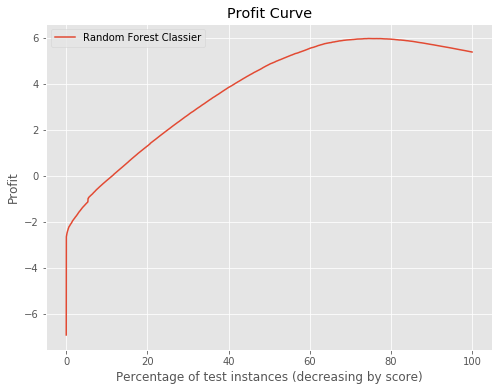

In [96]:
# Plot!
plt.rcParams["figure.figsize"] = (8,6)
plot_profit_model(profits, label="Random Forest Classier")

In [97]:
best_threshold, max_profit = find_best_threshold(thresholds, profits)
print("The best threshold is {}, which gives a max profit of {}".format(best_threshold, max_profit))

The best threshold is 0.219120614308, which gives a max profit of 5.97259971274


In [98]:
y_predict = [int(x) for x in (probabilities > best_threshold)]
standard_confusion_matrix(y_test, y_predict)

array([[30706,  6130],
       [  612,  7807]])

In [99]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
def print_results(y_true, y_pred):
    print("Accuracy: {}".format(accuracy_score(y_true, y_pred)))
    print("Precision: {}".format(precision_score(y_true, y_pred)))
    print("Recall: {}".format(recall_score(y_true, y_pred)))
    print("f1-score: {}".format(f1_score(y_true, y_pred)))

In [100]:
print_results(y_test, probabilities > best_threshold)

Accuracy: 0.851021986521
Precision: 0.833586708655
Recall: 0.980458522256
f1-score: 0.901076972738
